# Notebook for analyzing Grenville thermochron data compilation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Let's use general constraints on the closure temperatures for the minerals.

- Biotite: 280 +- 40
- Hornblende: 530 +- 50
- Monazite: 600-650
- Titanite: 660-700
- Rutile: 500-540



# Bancroft Terrane records


## Halibruton Intrusions

- Berger 1981
- Hanes 1988 Bark Lake

### Berger 1981a, Hanes 1988a, Warnock 2000

- G16-25 biotite is irradiated and produce anomalous result comparing to others, we thus filter it out
- Hanes 1988 has muscovite and k-spar ages on Bark Lake diorite

In [3]:
Berger1981a_ages = pd.read_csv('../data/thermochron_compilation/Berger1981a.csv')
Hanes1988a_ages = pd.read_csv('../data/thermochron_compilation/Hanes1988a.csv')
Warnock2000a_ages = pd.read_csv('../data/thermochron_compilation/Warnock2000a.csv')

Haliburton_ages = pd.concat([Berger1981a_ages, Hanes1988a_ages[Hanes1988a_ages['Geological_Info'].str.contains('Bancroft')], Warnock2000a_ages])
Haliburton_ages = Haliburton_ages[Haliburton_ages['Age'] != 955]
Haliburton_ages = Haliburton_ages[~Haliburton_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)

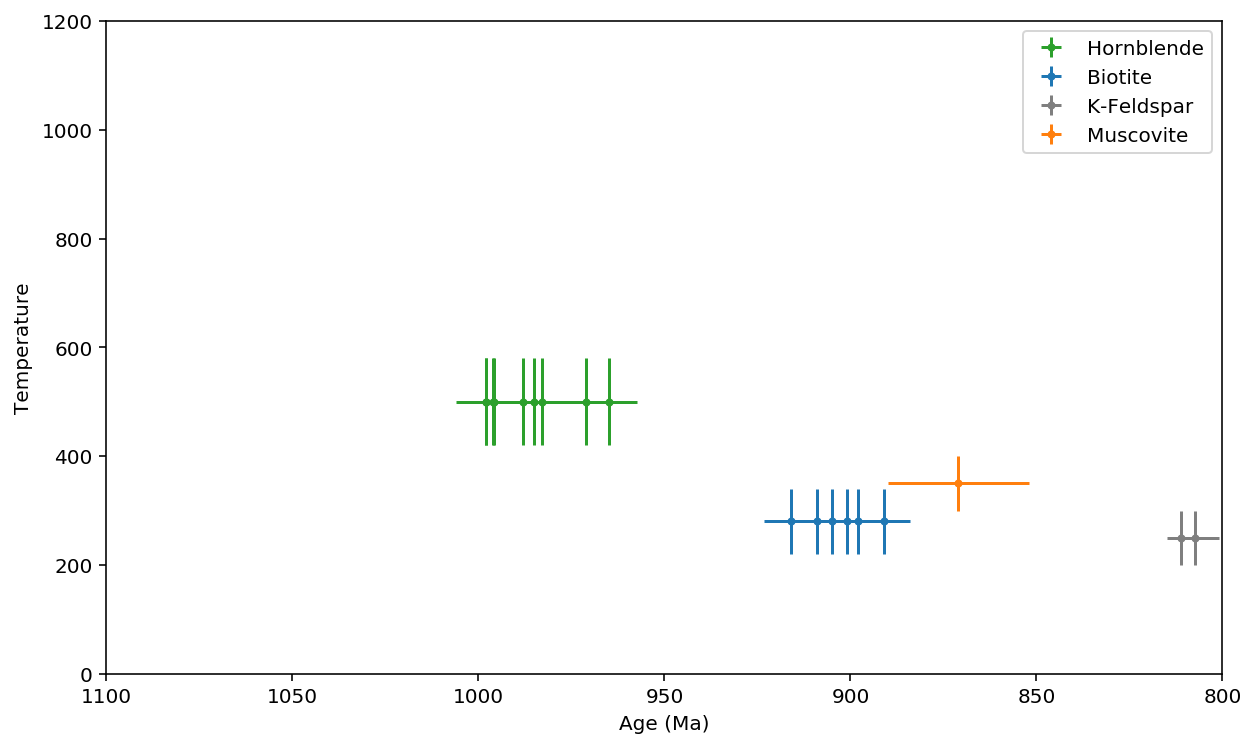

In [4]:
plt.figure(figsize=(10, 6))
for i in Haliburton_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Haliburton_ages[Haliburton_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Haliburton + Mezger 1991b, Mezger1993, Cosca 1992, Cosca 1995

- Cosca's muscovite ages are much older than amphibole ages, consider removing muscovite ages

In [5]:
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')
Cosca1995a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1995a.csv')
Mezger1991b_ages = pd.read_csv('../data/thermochron_compilation/Mezger1991b.csv')
Mezger1993a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1993a.csv')

Bancroft_ages = pd.concat([Haliburton_ages, Cosca1992a_ages, Cosca1995a_ages, Mezger1991b_ages, Mezger1993a_ages])
Bancroft_ages = Bancroft_ages[Bancroft_ages['Geological_Info'].str.contains('Bancroft')]
Bancroft_ages = Bancroft_ages[~Bancroft_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Muscovite')].reset_index(drop=1)
# Mezger1993a_ages

In [66]:
Bancroft_ages.to_csv('../data/thermochron_compilation/Bancroft_ages.csv', index=0)

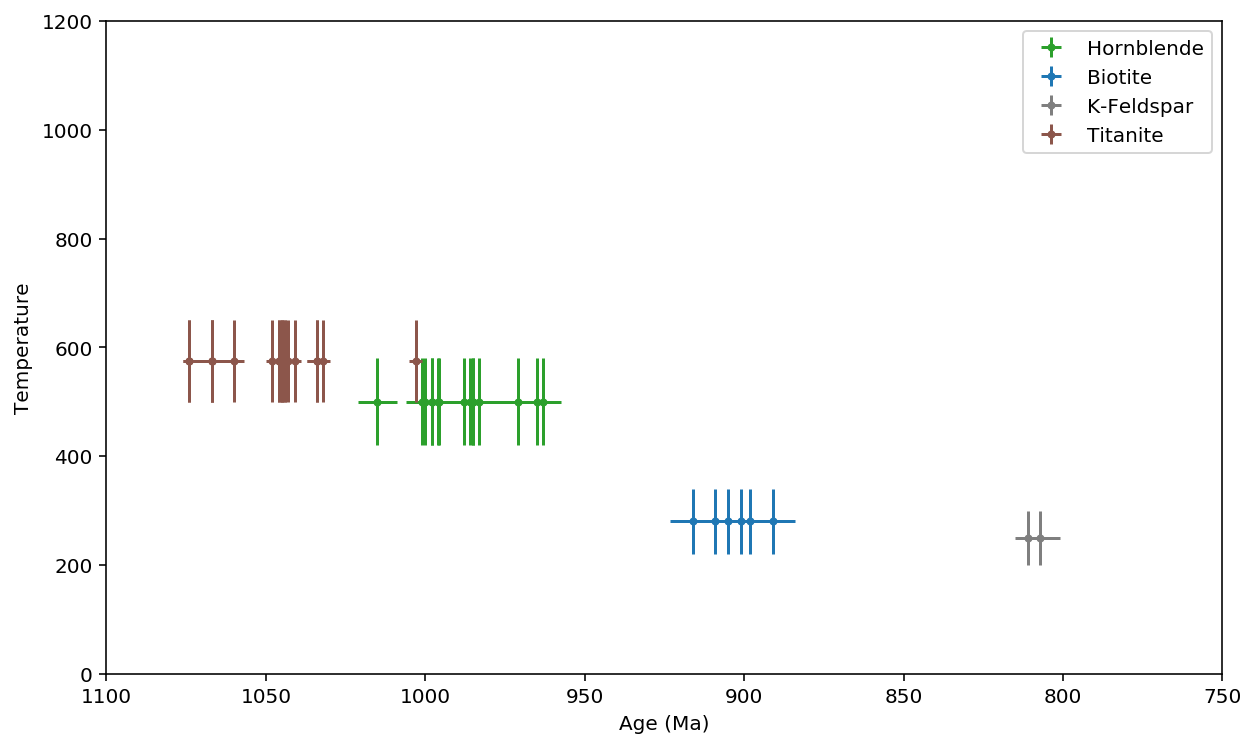

In [7]:
plt.figure(figsize=(10, 6))
for i in Bancroft_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Bancroft_ages[Bancroft_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 750)
plt.legend()
plt.show()

## Cordova Gabbro
- Lopez-Martinez 1983 Hornblende, plagioclase but potentially there are multi generations of hornblende, making the Ar difference suspicious
- Lopez plag data consistent with pmag interpretation that the southerly component C is Paleozoic overprint

### Lopez-Martinez 1983

In [8]:
Lopez1983a_ages = pd.read_csv('../data/thermochron_compilation/Lopez-Martinez1983a.csv')
Lopez1983a_ages = Lopez1983a_ages[Lopez1983a_ages['Age_Material'] == 'Hornblende']
Lopez1983a_ages = Lopez1983a_ages[~Lopez1983a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)

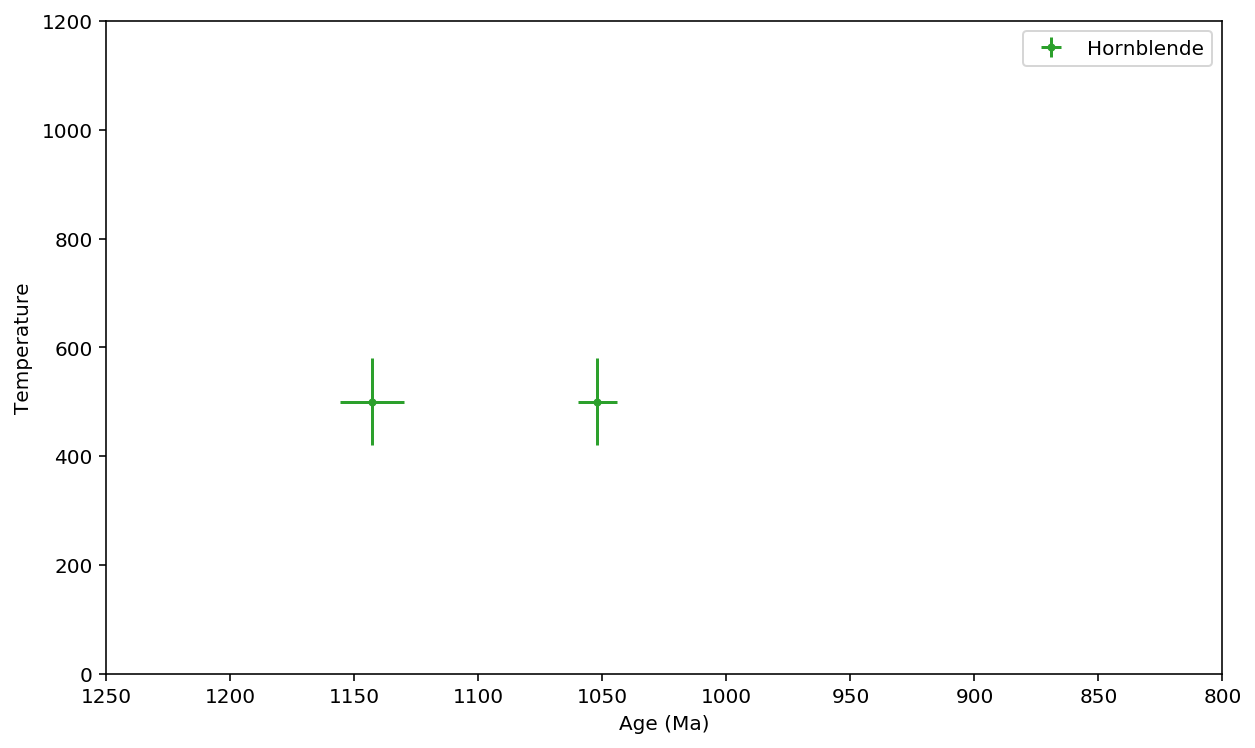

In [9]:
plt.figure(figsize=(10, 6))
for i in Lopez1983a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Lopez1983a_ages[Lopez1983a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

## Thanet Gabbro

### Berger 1981b

In [10]:
Berger1981b_ages = pd.read_csv('../data/thermochron_compilation/Berger1981b.csv')
Berger1981b_ages = Berger1981b_ages[~Berger1981b_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
Berger1981b_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,TH15-86,1202.0,10.0,10.0,Ar/Ar,Direct,NaN,Hornblende,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
1,TH2-34,1056.0,8.1,8.1,Ar/Ar,Direct,NaN,Hornblende,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
2,TH15-86,1090.5,7.8,7.8,Ar/Ar,Direct,NaN,Biotite,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."
3,TH15-85,1083.4,7.7,7.7,Ar/Ar,Direct,NaN,Biotite,Ar Furnace-Step,NaN,Grenville Province,ON,45,-78,NaN,NaN,NaN,NaN,"Berger, G. W., & York, D. (1981). 40Ar/39Ar da..."


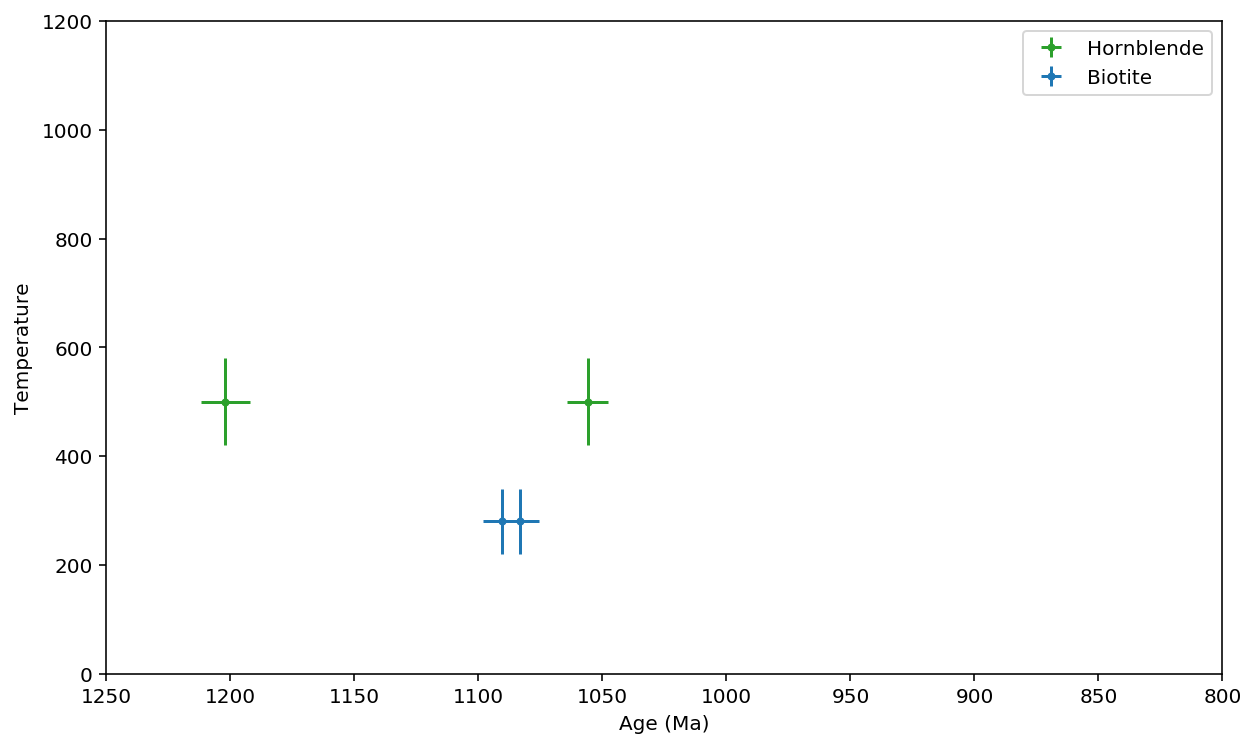

In [11]:
plt.figure(figsize=(10, 6))
for i in Berger1981b_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Berger1981b_ages[Berger1981b_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

## Umfraville anorthosite 
- Palmer 1979 has a 911 Ma whole rock Ar data that corresponds to about 250 C

### Palmer 1979

In [12]:
Palmer1979a_ages = pd.read_csv('../data/thermochron_compilation/Palmer1979a.csv')
Palmer1979a_ages = Palmer1979a_ages[~Palmer1979a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
Palmer1979a_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,SP-25,911,11,11,Ar/Ar,Direct,Whole Rock,Whole Rock,Ar Furnace-Step,NaN,Grenville Province,ON,44.95,-77.75,"Umfraville, 20 km south of Bancroft, Ontario","Central Metasedimentary Belt, Bancroft Terrane",NaN,NaN,"Palmer, H. C., Hayatsu, A., Waboso, C. E., & P..."


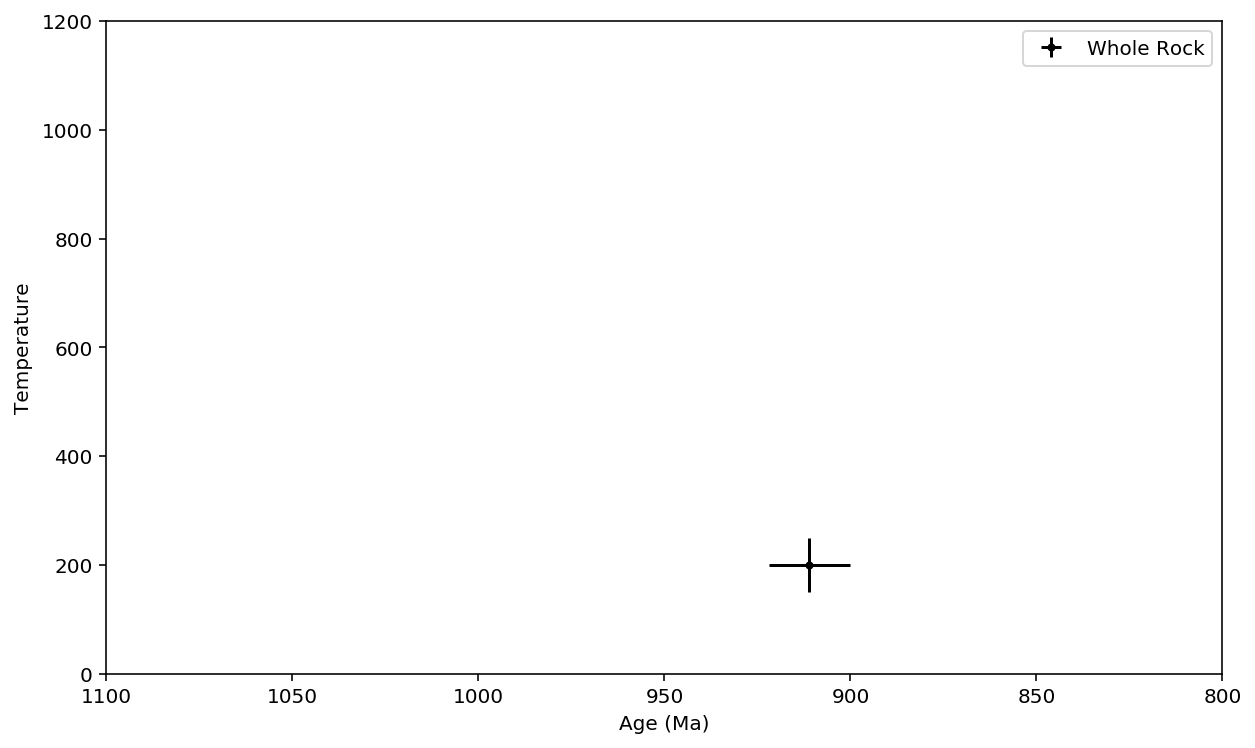

In [13]:
plt.figure(figsize=(10, 6))
for i in Palmer1979a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Palmer1979a_ages[Palmer1979a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

# Elzevir Terrane records


## Hanes 1988, Mezger 19991b, Mezger 1993, Cosca 1991a, Cosca 1992a, Cureton 1997, Streepey 2002
- we prefer to use the younger hornblende ages because the occurrence of two genreations of amphiboles within the samples in Cosca 1991
- we filter out Elzevir titanite from Mezger 1993 that did not grow during Grenville but earlier

In [14]:
Hanes1988a_ages = pd.read_csv('../data/thermochron_compilation/Hanes1988a.csv')
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1991a_ages = Cosca1991a_ages[Cosca1991a_ages['Age'] < 1000]
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')
Cureton1997a_ages = pd.read_csv('../data/thermochron_compilation/Cureton1997a.csv')
Mezger1991b_ages = pd.read_csv('../data/thermochron_compilation/Mezger1991b.csv')
Mezger1993a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1993a.csv')
Mezger1993a_ages = Mezger1993a_ages[Mezger1993a_ages['Sample_No'] != 2927]
Mezger1993a_ages = Mezger1993a_ages[Mezger1993a_ages['Age'] < 1100]
Streepey2002a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2002a.csv')

Elzevir_ages = pd.concat([Hanes1988a_ages, Cosca1991a_ages, Cosca1992a_ages, Cureton1997a_ages, Mezger1991b_ages, Mezger1993a_ages, Streepey2002a_ages])
Elzevir_ages = Elzevir_ages[Elzevir_ages['Geological_Info'].str.contains('Elzevir')]
Elzevir_ages = Elzevir_ages[~Elzevir_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)

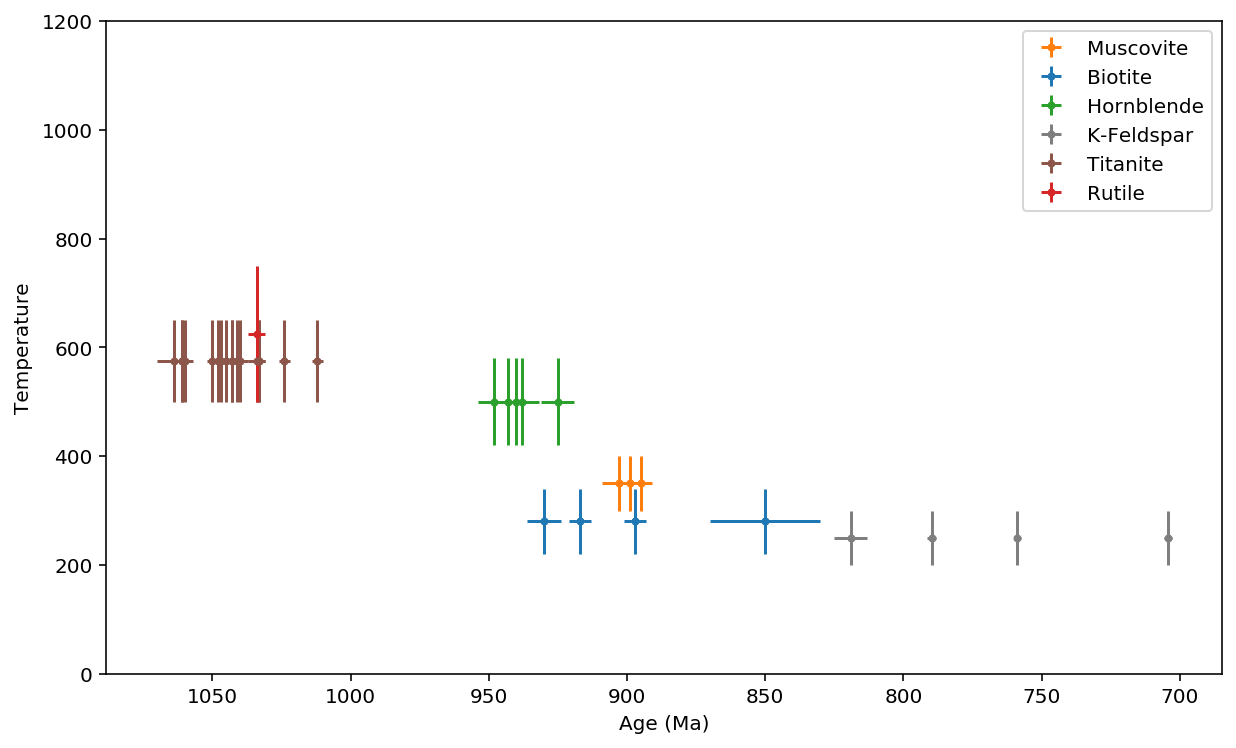

In [15]:
plt.figure(figsize=(10, 6))
for i in Elzevir_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Elzevir_ages[Elzevir_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
# plt.xlim(1100, 750)
plt.legend()
plt.show()

# Mazinaw Terrane records

## Busch 1996b, Corfu 1995a, Cureton 1997, 

In [17]:
Busch1996b_ages = pd.read_csv('../data/thermochron_compilation/Busch1996b.csv')
Busch1996b_Mazinaw_ages = Busch1996b_ages[Busch1996b_ages['Geological_Info'].str.contains('Mazinaw')]
Corfu1995a_ages = pd.read_csv('../data/thermochron_compilation/Corfu1995a.csv')
Corfu1995a_ages = Corfu1995a_ages[~Corfu1995a_ages['Sample_No'].str.contains('C-93-9')]
Cureton1997a_ages = pd.read_csv('../data/thermochron_compilation/Cureton1997a.csv')
Mazinaw_ages = pd.concat([Busch1996b_Mazinaw_ages, Corfu1995a_ages, Cureton1997a_ages])
Mazinaw_ages = Mazinaw_ages[~Mazinaw_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)

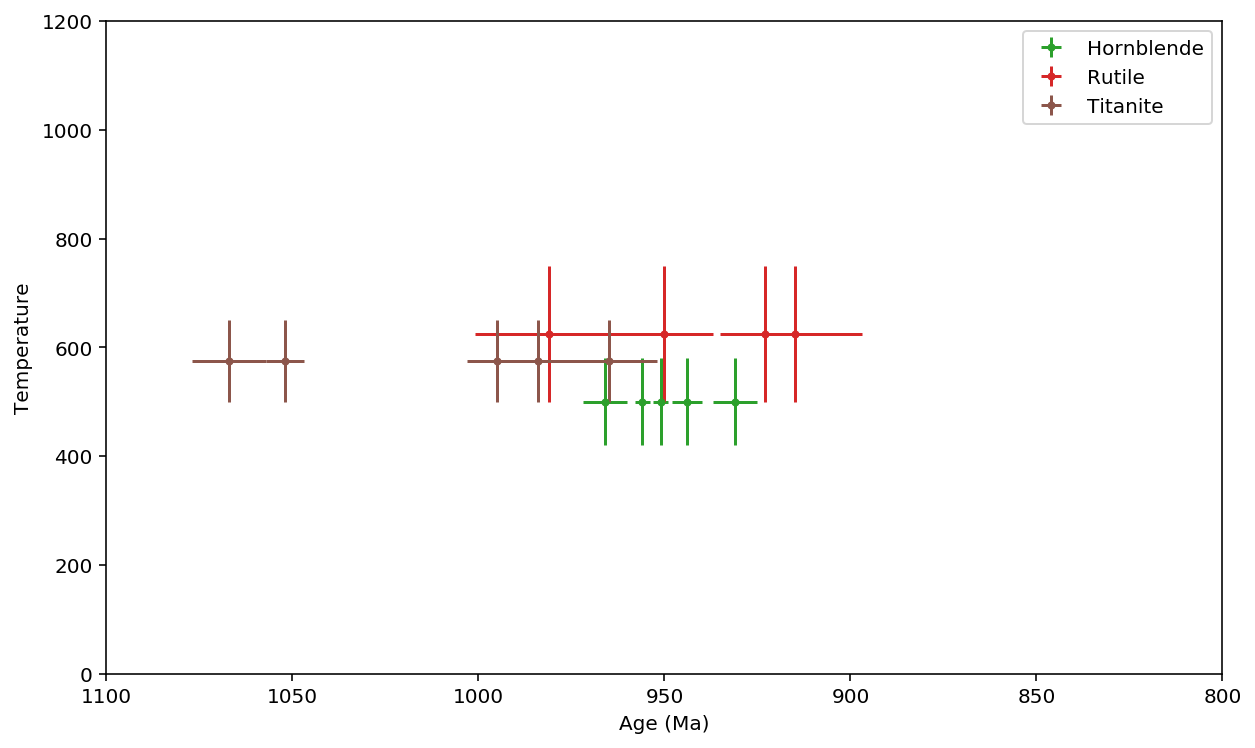

In [18]:
plt.figure(figsize=(10, 6))
for i in Mazinaw_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Mazinaw_ages[Mazinaw_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

# Sharbot Lake Terrane records

## Busch 1996a, b, Cosca 1991a, Cosca 1992a, Streepey 2002

- RVL20 sample is from the Lavant gabbro which was interpreted to not have experienced metamorphism in the hanging wall of the RLSZ
- MTG175 has hornblende age younger than mica age, which could be due to biotite Ar excess issue
- Cosca SSA-14 and HL86-7 are suspicious hornblende and biotite data

In [19]:
Busch1996a_ages = pd.read_csv('../data/thermochron_compilation/Busch1996a.csv')
Busch1996b_ages = pd.read_csv('../data/thermochron_compilation/Busch1996b.csv')
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')
Streepey2002a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2002a.csv')

Sharbot_ages = pd.concat([Busch1996a_ages, Busch1996b_ages, Cosca1991a_ages, Cosca1992a_ages, Streepey2002a_ages])
Sharbot_ages = Sharbot_ages[Sharbot_ages['Geological_Info'].str.contains('Sharbot')]
Sharbot_ages = Sharbot_ages[~Sharbot_ages['Sample_No'].str.contains('RVL20A|MTG175|SSA-14|HL86-7')]
Sharbot_ages = Sharbot_ages[~Sharbot_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
# Sharbot_ages.head()

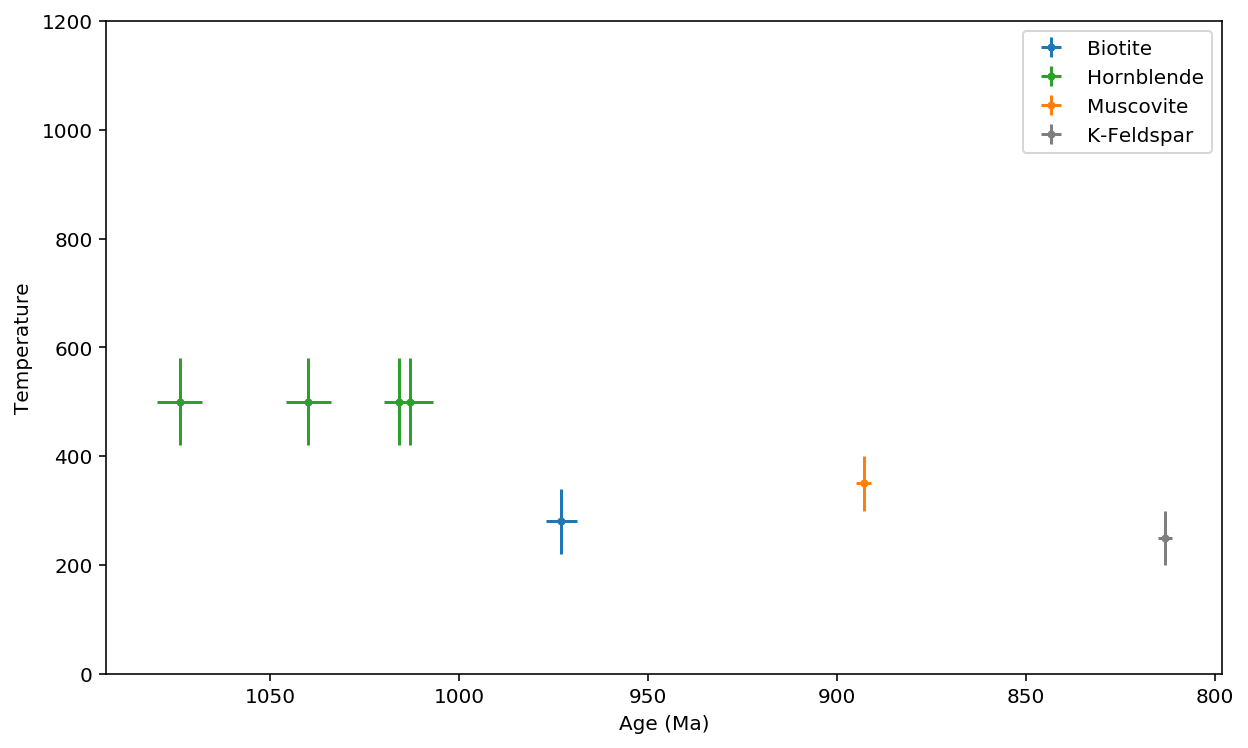

In [20]:
plt.figure(figsize=(10, 6))
for i in Sharbot_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Sharbot_ages[Sharbot_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

# Frontenac Terrane records

## Cosca 1991a, Cosca 1992a, Mezger 1993, Streepey 2002

In [21]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1992a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1992a.csv')
Mezger1993a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1993a.csv')
Streepey2002a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2002a.csv')

Fronteac_ages = pd.concat([Cosca1991a_ages, Cosca1992a_ages, Mezger1993a_ages, Streepey2002a_ages])

Fronteac_ages = Fronteac_ages[Fronteac_ages['Geological_Info'].str.contains('Frontenac')]
Fronteac_ages = Fronteac_ages[~Fronteac_ages['Sample_No'].str.contains('SSA-14|HL86-7')]
Fronteac_ages = Fronteac_ages[~Fronteac_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)

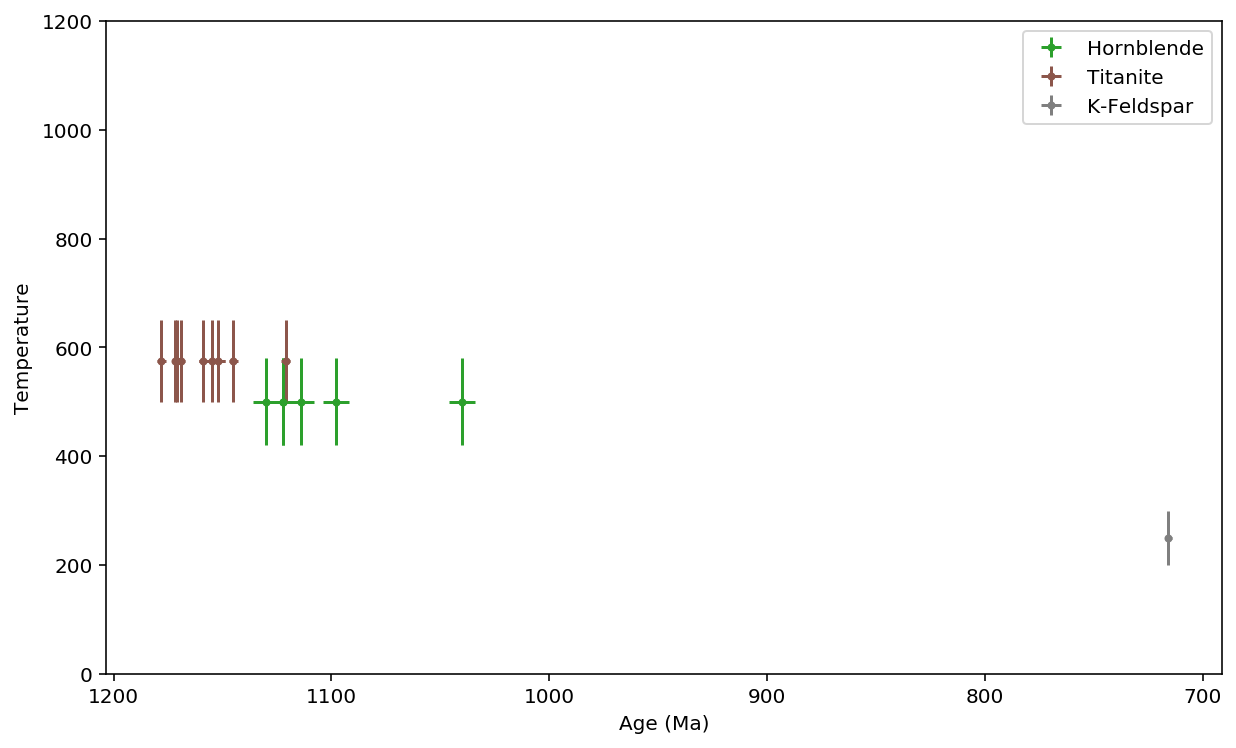

In [22]:
plt.figure(figsize=(10, 6))
for i in Fronteac_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Fronteac_ages[Fronteac_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.legend()
plt.show()

## Frontenac axis dikes whole rock thermochron

### Reynolds 1978

In [23]:
Frontenac_axis_ages = pd.read_csv('../data/thermochron_compilation/Reynolds1978a.csv')
Frontenac_axis_ages = Frontenac_axis_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
# Frontenac_axis_ages.head()

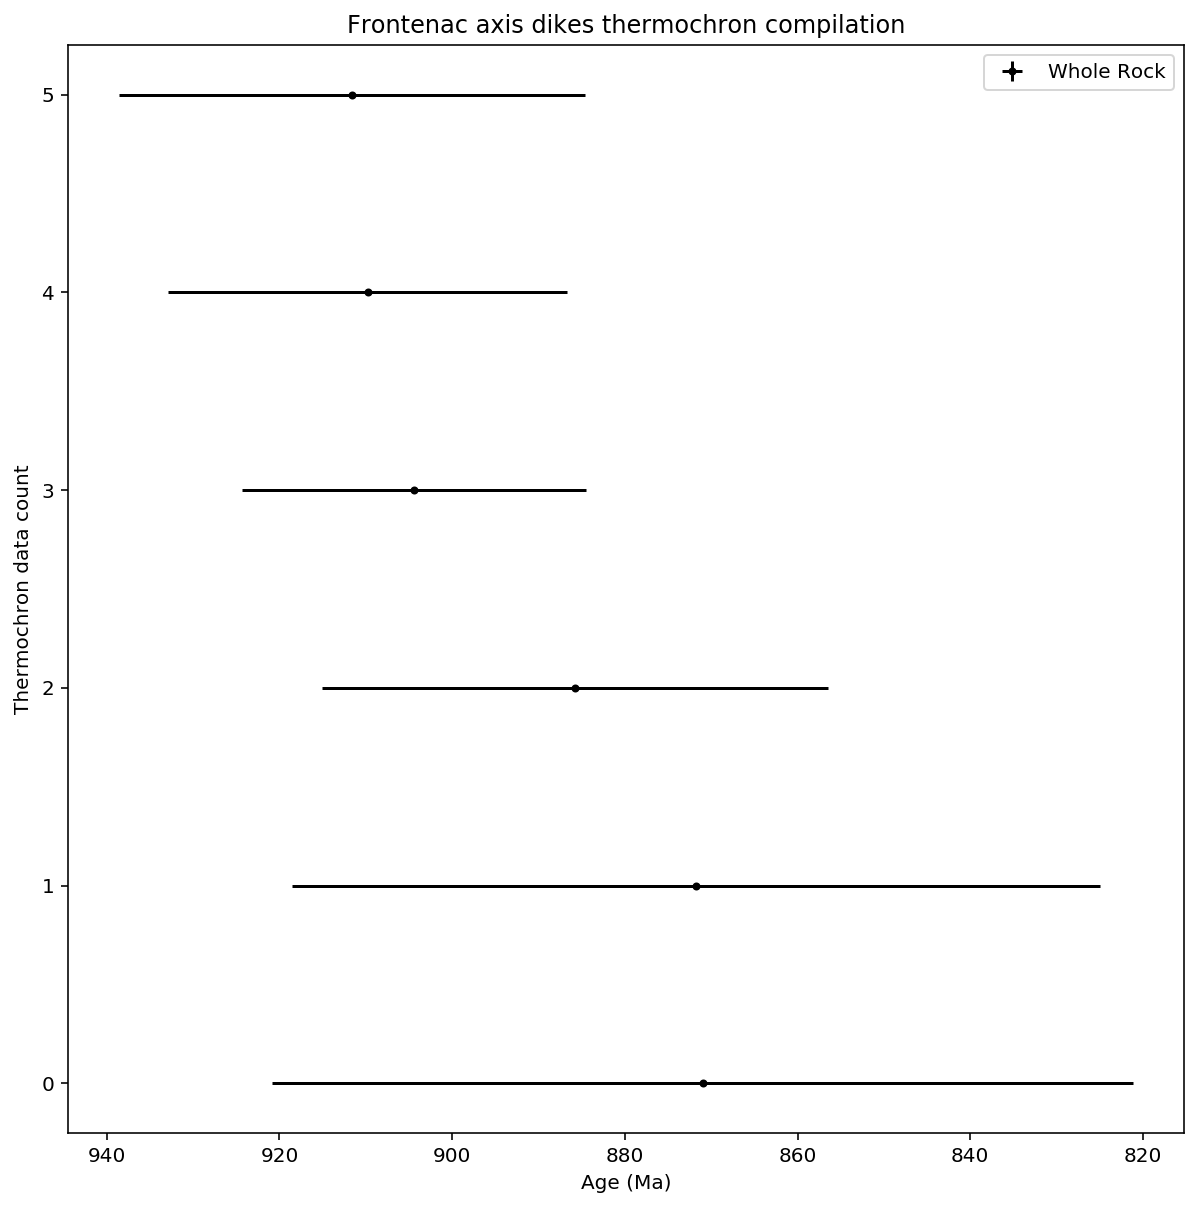

In [24]:
plt.figure(figsize=(10, 10))
for i in range(len(Frontenac_axis_ages.Age_Material.unique())):
    this_material = Frontenac_axis_ages[Frontenac_axis_ages['Age_Material'] == Frontenac_axis_ages.Age_Material.unique()[i]]
    plt.errorbar(this_material['Age'], this_material.index,  0, this_material['Error_Plus'], fmt='.',
                 color=color_dict[Frontenac_axis_ages.Age_Material.unique()[i]], ls='None', label=Frontenac_axis_ages.Age_Material.unique()[i])
plt.title('Frontenac axis dikes thermochron compilation')
plt.ylabel('Thermochron data count')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.legend()

# Adirondack lowlands ages

## Mezger 1989, Mezger 1991a, Mezger 1992, Heizler 1998, Dahl 2004, Streepey 2000, Streepey 2004

- Mezger's rutile ages are interesting in that they plt on top of some biotite ages and are younger than the hornblende ages from Dahl 2004. My interpretation here is that the rutiles are retrograde oxidation products
- Dahl 2004 authors interpreted that biotite specimen 47b, 15a, 50, 8, 14a have much older ages than amphibole and have excess argon and should be left off for analyses
- Dahl 2004 98-51 biotite doesnot have ideal plateau age as marked by the authors, thus dropped

In [73]:
Dahl2004a_ages = pd.read_csv('../data/thermochron_compilation/Dahl2004a.csv')
Dahl2004a_ages = Dahl2004a_ages.drop([13, 16, 17, 21, 33, 34])
Mezger1989a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1989a.csv')
Mezger1991a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1991a.csv')
Mezger1992a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1992a.csv')
Heizler1998a_ages = pd.read_csv('../data/thermochron_compilation/Heizler1998a.csv')
Streepey2000a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2000a.csv')
Streepey2004a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2004a.csv')

Adirondack_lowlands_ages = pd.concat([Dahl2004a_ages, Mezger1989a_ages, Mezger1991a_ages, Mezger1992a_ages, Heizler1998a_ages, Streepey2000a_ages, Streepey2004a_ages])
Adirondack_lowlands_ages = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Geological_Info'].str.contains('Adirondack Lowlands')]
Adirondack_lowlands_ages = Adirondack_lowlands_ages[~Adirondack_lowlands_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite')].reset_index(drop=1)
# Adirondack_lowlands_ages

In [74]:
Adirondack_lowlands_ages.to_csv('../data/thermochron_compilation/Adirondack_lowlands_ages.csv', index=0)

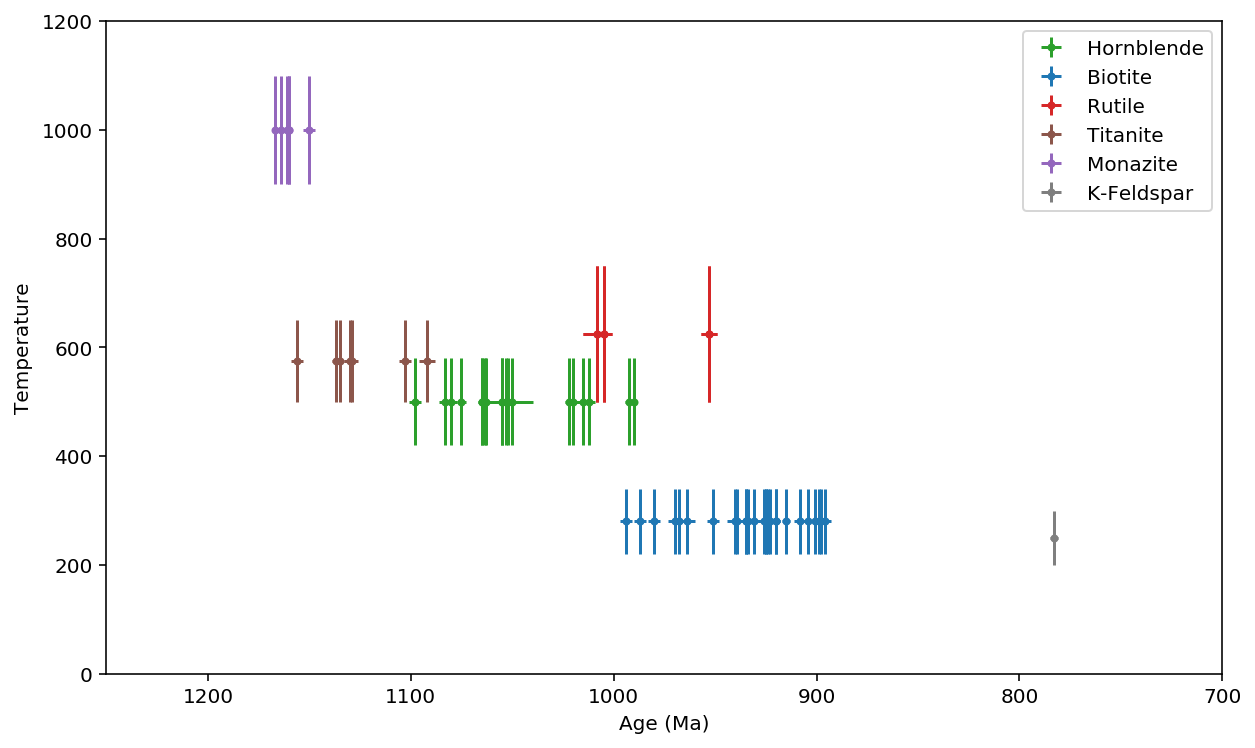

In [75]:
plt.figure(figsize=(10, 6))
for i in Adirondack_lowlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_lowlands_ages[Adirondack_lowlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 700)
plt.legend()
plt.show()

# Adirondack highlands ages

## Mezger 1989, Mezger 1991a, Heizler 1998, Streepey 2000, Streepey 2002, Streepey 2004
- I think this really speaks to the rutiles being oxidation product!
- Streepey 2000 hornblende A125 is way too old as compared to others, although authors did not discard this I think this age could be from a different generation of amphibole and should be disregarded for our analyses
- Heizler k-spar data are difficult to directly use here

- Heizler Ar ages are all total gas and can be tricky to use - large spread, we drop here

In [79]:
Mezger1989a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1989a.csv')
Mezger1991a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1991a.csv')
Mezger1992a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1992a.csv')
Mezger1992a_ages = Mezger1992a_ages[~Mezger1992a_ages['Sample_No'].str.contains('D2|90-64|90-60')]
Heizler1998a_ages = pd.read_csv('../data/thermochron_compilation/Heizler1998a.csv')
Heizler1998a_ages = Heizler1998a_ages[Heizler1998a_ages['Age'] != 1060]
Streepey2000a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2000a.csv')
Streepey2002a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2002a.csv')
Streepey2004a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2004a.csv')
Streepey2004a_ages = Streepey2004a_ages[~Streepey2004a_ages['Sample_No'].str.contains('A135')]

Adirondack_highlands_ages = pd.concat([Mezger1989a_ages, Mezger1991a_ages, Mezger1992a_ages, Streepey2000a_ages, Streepey2002a_ages, Streepey2004a_ages])
Adirondack_highlands_ages = Adirondack_highlands_ages[Adirondack_highlands_ages['Geological_Info'].str.contains('Adirondack Highlands')]
Adirondack_highlands_ages = Adirondack_highlands_ages[~Adirondack_highlands_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite|K-Feldspar')].reset_index(drop=1)
# Adirondack_highlands_ages

In [80]:
Adirondack_highlands_ages.to_csv('../data/thermochron_compilation/Adirondack_highlands_ages.csv', index=0)

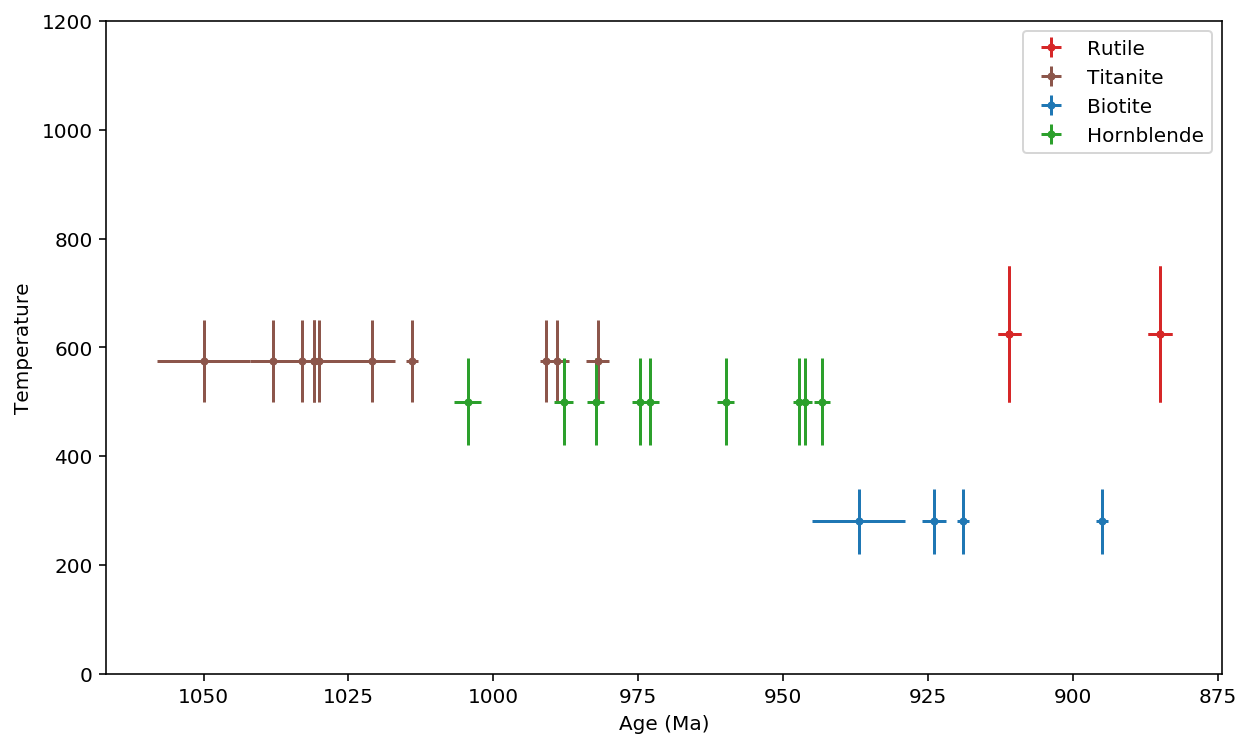

In [81]:
plt.figure(figsize=(10, 6))
for i in Adirondack_highlands_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Adirondack_highlands_ages[Adirondack_highlands_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
# plt.xlim(1250, 700)
plt.legend()
plt.show()

# Carthage-Colton Shear Zone
## Mezger 1992, Streepey 2001, Streepey 2004
- old titanite ages are interpreted to hav escaped reset of Elzevirian metamorphism

In [71]:
Mezger1992a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1992a.csv')
Mezger1992a_ages = Mezger1992a_ages[~Mezger1992a_ages['Sample_No'].str.contains('D2|90-64|90-60')]
Streepey2001a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2001a.csv')
Streepey2004a_ages = pd.read_csv('../data/thermochron_compilation/Streepey2004a.csv')


Carthage_ages = pd.concat([Mezger1992a_ages, Streepey2000a_ages, Streepey2001a_ages, Streepey2004a_ages])
Carthage_ages = Carthage_ages[Carthage_ages['Geological_Info'].str.contains('Carthage')]
Carthage_ages = Carthage_ages[~Carthage_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)

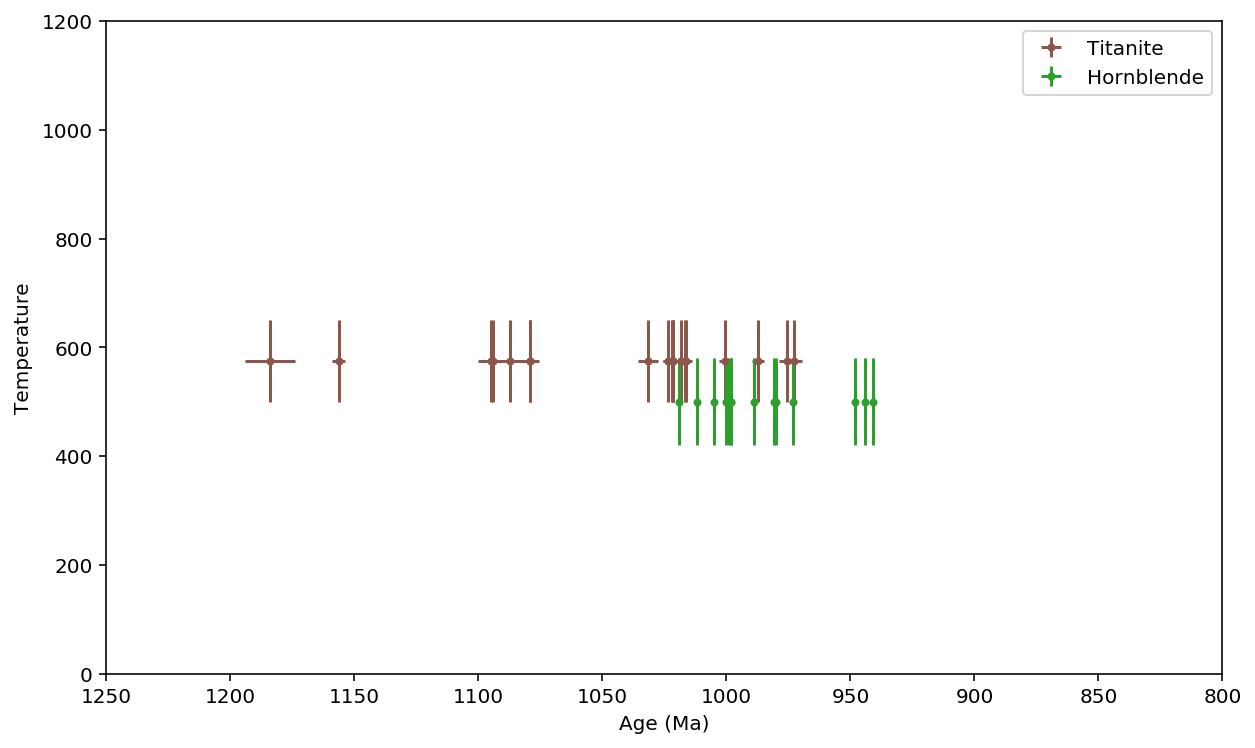

In [72]:
plt.figure(figsize=(10, 6))
for i in Carthage_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Carthage_ages[Carthage_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1250, 800)
plt.legend()
plt.show()

# Central Metasedimentary Belt ages

## Friedman 1995 Mont-Laurier terrane, Morin complex, and Reservoir Cabonga

- Morin Complex zircons have ages of 1157 and 1165 Ma
- We take Rutile ages here for compiling CMB thermochron 

In [34]:
Friedman1995a_ages = pd.read_csv('../data/thermochron_compilation/Friedman1995a.csv')
Friedman1995a_ages = Friedman1995a_ages[Friedman1995a_ages['Age_Material'].str.contains('Rutile')].reset_index(drop=1)
# Friedman1995a_ages.head()

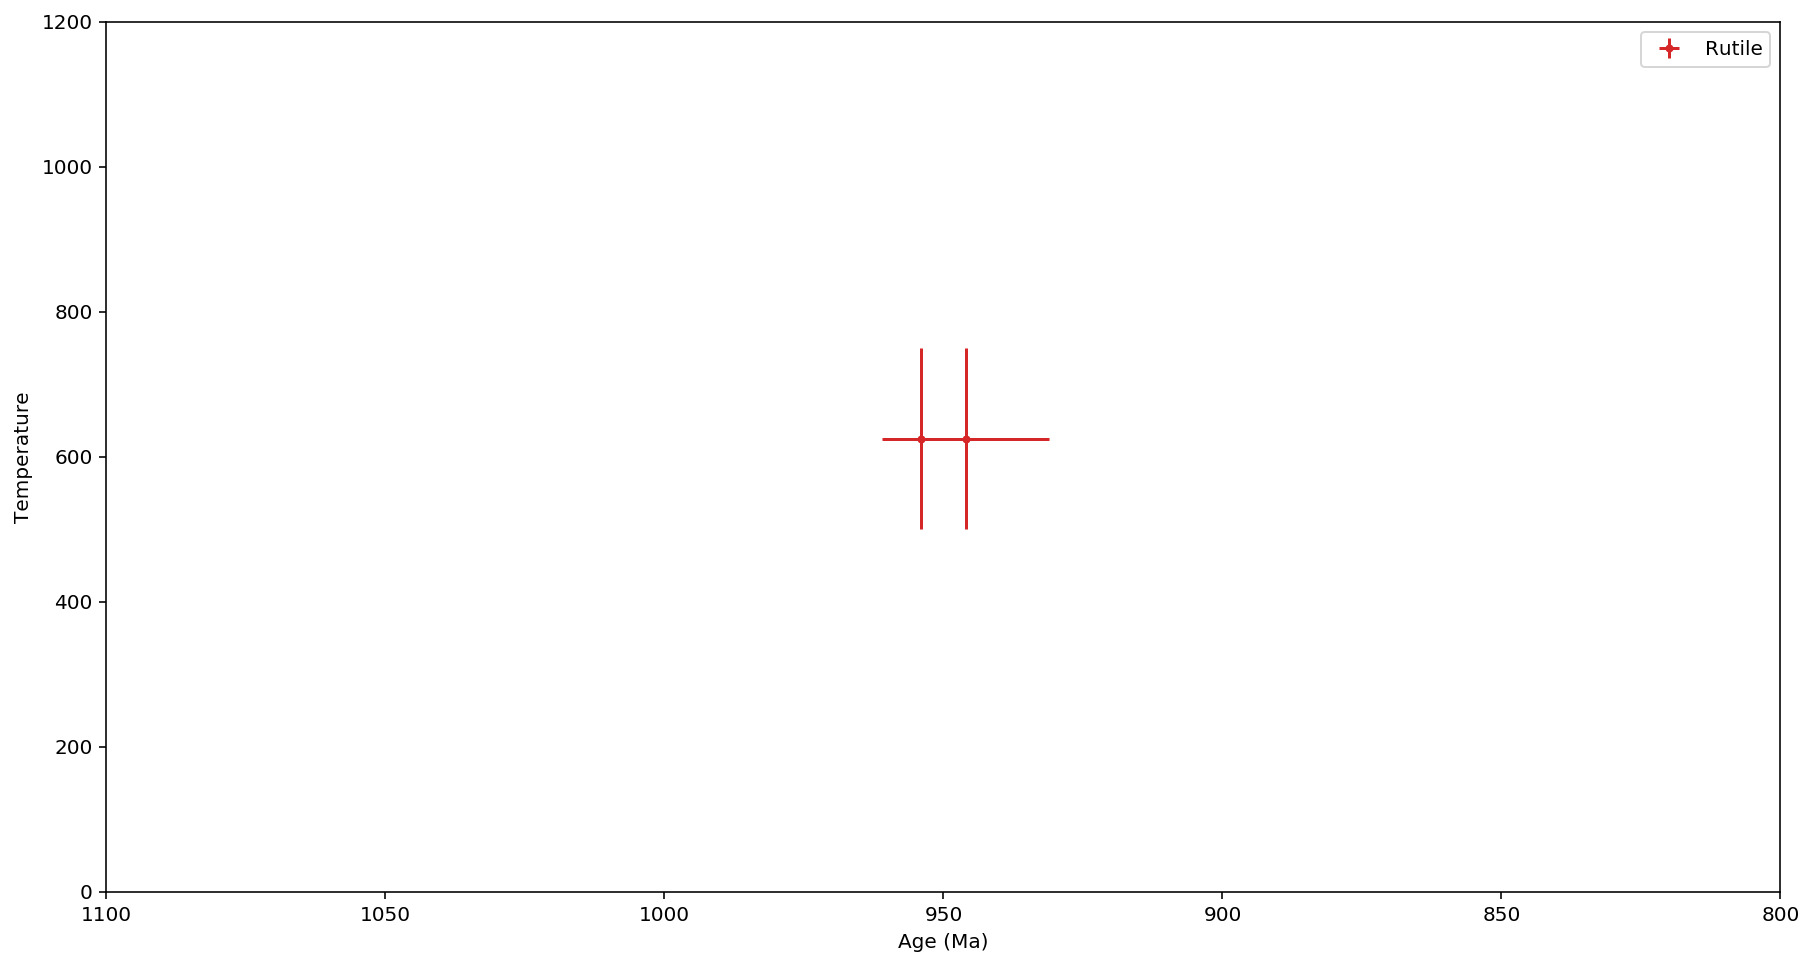

In [35]:
plt.figure(figsize=(15, 8))
for i in Friedman1995a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Friedman1995a_ages[Friedman1995a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.ylim(0, 1200)
plt.xlim(800, 1100)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

# Grenville Front Tectonic Zone

## Haggart 1993
- Haggart 1993 thermochron data on the Huron Supergroup rocks of the Southern Province, felsic volcanic and high-level plutonic rocks of the Killarney Complex, and granitoid orthogneisses, am phibolites, and paragneisses of the Grenville Front Tectonic Zone
- Metamorphic grade changes from greenschist facies in the Killarney Complex to epidote amphibolite facies in the Grenville Front mylonites

- sample GF-8H has excess argon; GF-32H, CI-37H did not have concordant Ar date from hornblende
- sample GF-19B, GF-35B has biotite age older than hornblende age; and GF-7B have excessive argon
- sample GF-35K, CI-14K likely had gas loss from Grenville dike intrusions

## Mezger 1993
- one monazite age

## Reynolds 1995
- Ar dates
- sample E-GFTZ 103 k-spar does not have plateau age
- Muscovite 91 is small and has not plateau with too old age
- spectrum for 94 is incomplete due to vaccum issue

In [36]:
Haggart1993a_ages =  pd.read_csv('../data/thermochron_compilation/Haggart1993a.csv')
Haggart1993a_ages = Haggart1993a_ages[~Haggart1993a_ages['Sample_No'].str.contains('GF-8|GF-32|CI-37|GF-19|GF-7|CI-14|GF-35')]
Mezger1993a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1993a.csv')
Reynolds1995a_ages = pd.read_csv('../data/thermochron_compilation/Reynolds1995a.csv')
Reynolds1995a_ages = Reynolds1995a_ages[Reynolds1995a_ages['Age'] != 985]
Reynolds1995a_ages = Reynolds1995a_ages[Reynolds1995a_ages['Age'] != 1116]
Reynolds1995a_ages = Reynolds1995a_ages[Reynolds1995a_ages['Age'] != 1124]
GFTZ_ages = pd.concat([Haggart1993a_ages, Mezger1993a_ages, Reynolds1995a_ages])
GFTZ_ages = GFTZ_ages[GFTZ_ages['Geological_Info'].str.contains('Tectonic')]
GFTZ_ages = GFTZ_ages[~GFTZ_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Xenotime')].reset_index(drop=1)
# GFTZ_ages

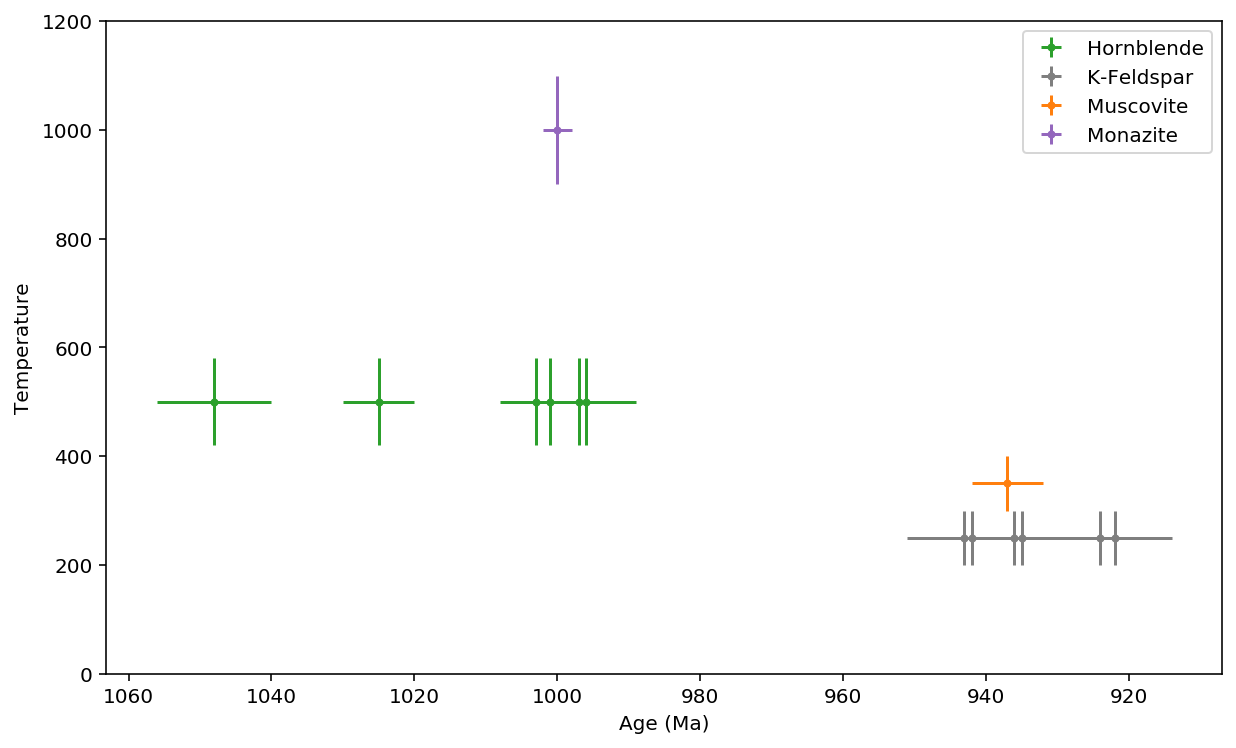

In [37]:
plt.figure(figsize=(10, 6))
for i in GFTZ_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = GFTZ_ages[GFTZ_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
# plt.xlim(1100, 800)
plt.legend()
plt.show()

# Central Gneiss Belt ages

## Cosca 1991, undivided

- SSA-14 has younger hornblende age than biotite age, thus drop older biotite
- we may also consider dropping biotite data as the author said the biotite has the least reliable results

In [38]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Cosca1991a_ages = Cosca1991a_ages[Cosca1991a_ages['Geological_Info'].str.contains('Central Gneiss Belt - unknown')]
Cosca1991a_ages = Cosca1991a_ages[~Cosca1991a_ages['Sample_No'].str.contains('SSA-14|HL86-7')]
Cosca1991a_ages = Cosca1991a_ages[~Cosca1991a_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite')].reset_index(drop=1)
# Cosca1991a_ages.head()

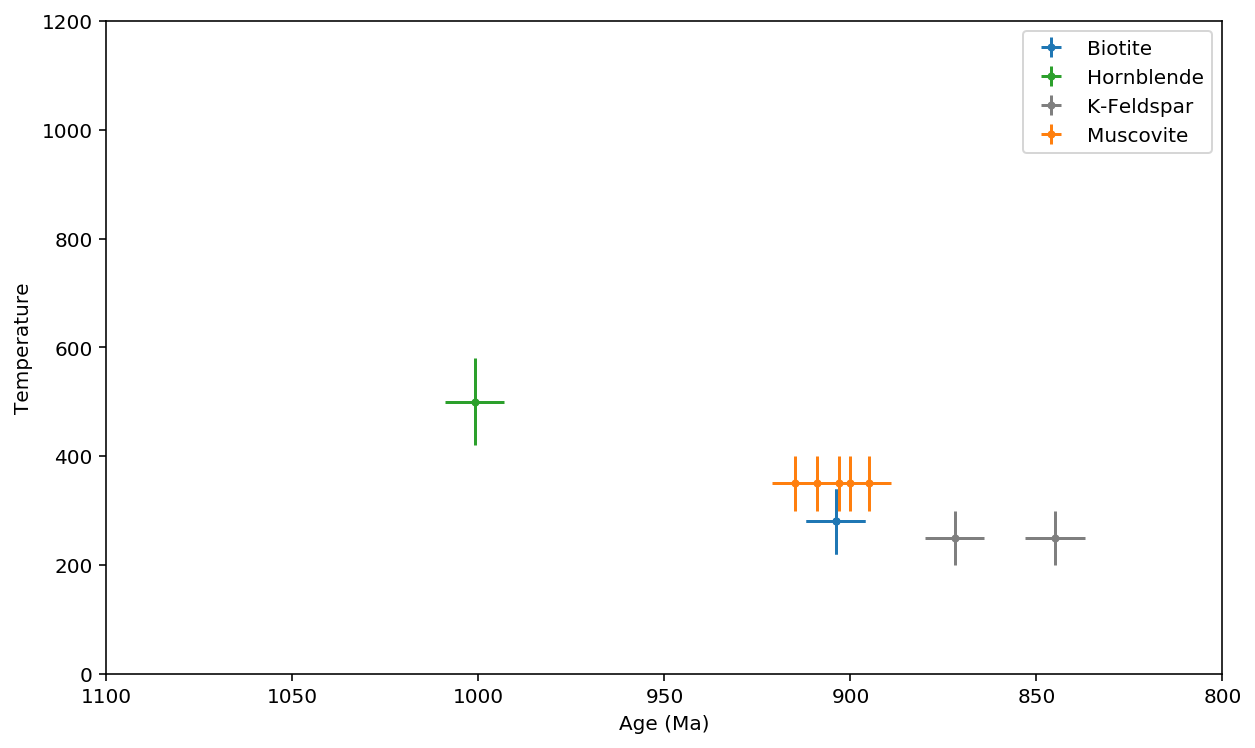

In [39]:
plt.figure(figsize=(10, 6))
for i in Cosca1991a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Cosca1991a_ages[Cosca1991a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Britt Domain

### Culshaw 1991, Corrigan 1994, Ketchum 1998, Reynolds 1995

- Biotite age vary over large range and are typically of Grenville biotite behavior with excess argon.
- we exclude biotite results from our analyses

- Ketchum has titanite dates for Britt domain
- sample TK84-91 is notstrongly annealed but contains polycrystalline titanite aggregates derived from recrystalized larger grains
- authors prefer to interpret that the titanite younger than 1018 are hydrothermal in origin

In [40]:
Culshaw1991a_ages = pd.read_csv('../data/thermochron_compilation/Culshaw1991a.csv')
Ketchum1998a_ages = pd.read_csv('../data/thermochron_compilation/Ketchum1998a.csv')
Ketchum1998a_ages = Ketchum1998a_ages[Ketchum1998a_ages['Age'] <= 1028]
Ketchum1998a_ages = Ketchum1998a_ages[Ketchum1998a_ages['Age'] >= 1018]
Corrigan1994a_ages = pd.read_csv('../data/thermochron_compilation/Corrigan1994a.csv')
Reynolds1995a_ages = pd.read_csv('../data/thermochron_compilation/Reynolds1995a.csv')

Britt_ages = pd.concat([Culshaw1991a_ages, Ketchum1998a_ages, Corrigan1994a_ages, Reynolds1995a_ages])
Britt_ages = Britt_ages[Britt_ages['Geological_Info'].str.contains('Britt')]
Britt_ages = Britt_ages[~Britt_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Monazite|Biotite')].reset_index(drop=1)

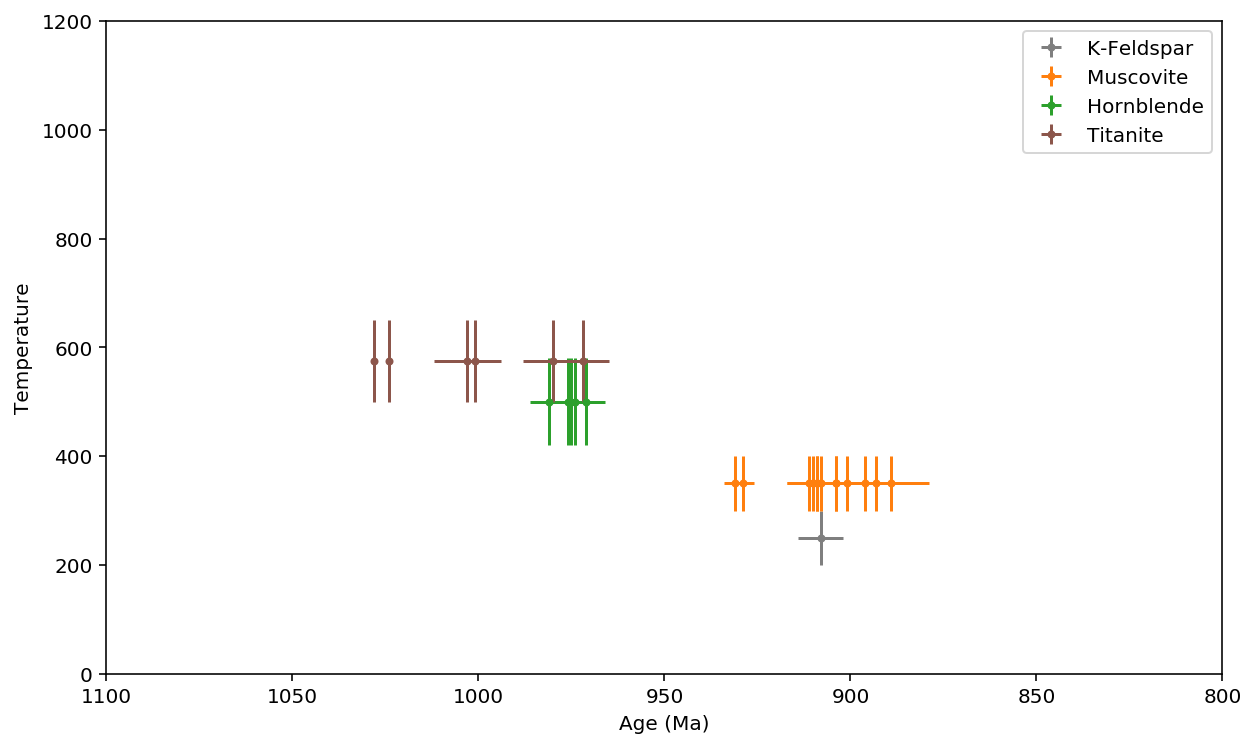

In [41]:
plt.figure(figsize=(10, 6))
for i in Britt_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Britt_ages[Britt_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Parry Sound domain

### Dallmeyer 1980 Whitestone diorite Ar Hornblende and Biotite thermochron 

In [42]:
Whitestone_ages = pd.read_csv('../data/thermochron_compilation/Dallmeyer1980a.csv')
Whitestone_ages = Whitestone_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Whitestone_ages.head()

,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,Age_Qualifier,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References
0,WA-15,936,15,15,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.66,-79.87,Whitestone diorite,"Central Gneiss Belt, Parry Sound",Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
1,WA-21,960,15,15,Ar/Ar,Cooling,NaN,Biotite,Ar Furnace-Step,Direct,Grenville Province,ON,45.66,-79.87,Whitestone diorite,"Central Gneiss Belt, Parry Sound",Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
2,WA-15,965,15,15,Ar/Ar,Cooling,NaN,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,45.66,-79.87,Whitestone diorite,"Central Gneiss Belt, Parry Sound",Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."
3,WA-21,991,15,15,Ar/Ar,Cooling,NaN,Hornblende,Ar Furnace-Step,Direct,Grenville Province,ON,45.66,-79.87,Whitestone diorite,"Central Gneiss Belt, Parry Sound",Plutonic,diorite,"Dallmeyer, R. D., & Sutter, J. F. (1980). Acqu..."


In [69]:
Whitestone_ages.to_csv('../data/thermochron_compilation/Whitestone_ages.csv', index=0)

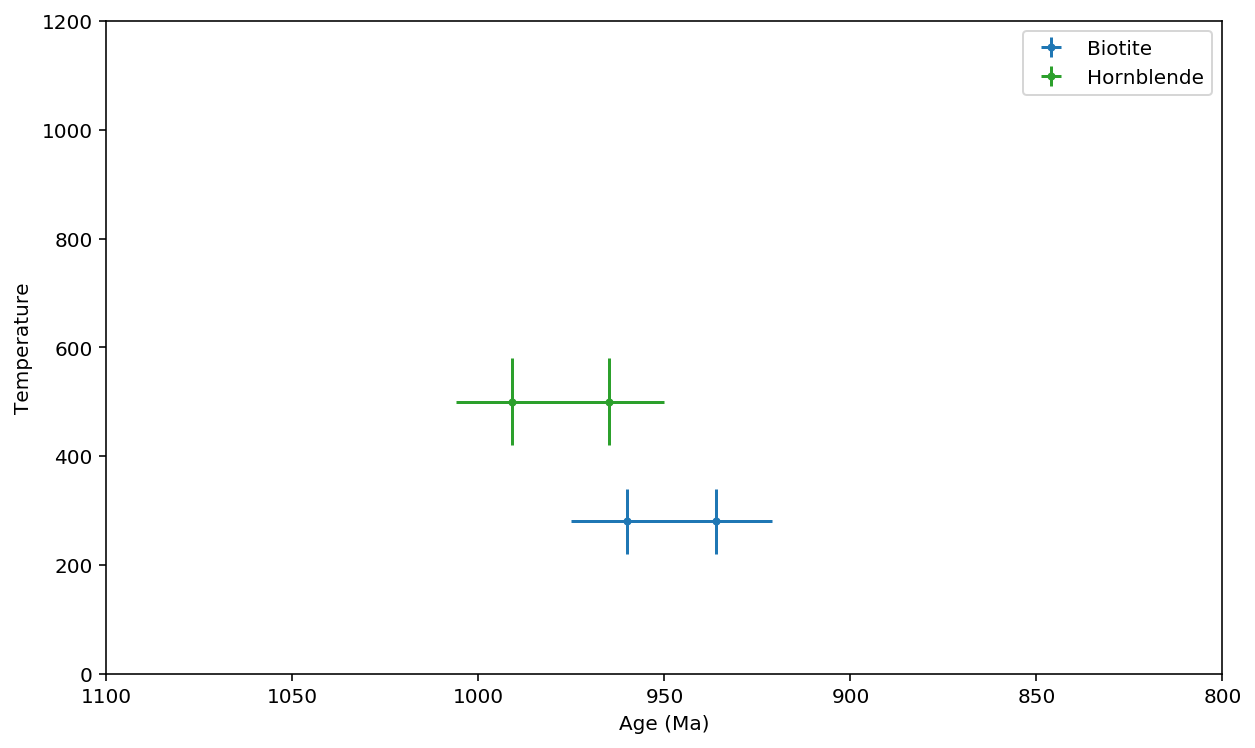

In [44]:
plt.figure(figsize=(10, 6))
for i in Whitestone_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Whitestone_ages[Whitestone_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.ylim(0, 1200)
plt.xlim(800, 1100)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

### Tuccillo 1992

In [45]:
Tuccillo1992a_ages = pd.read_csv('../data/thermochron_compilation/Tuccillo1992a.csv')
Tuccillo1992a_ages = Tuccillo1992a_ages[Tuccillo1992a_ages['Age_Material'].str.contains('Titanite')]
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Parry_ages = pd.concat([Cosca1991a_ages, Tuccillo1992a_ages])
Parry_ages = Parry_ages[Parry_ages['Geological_Info'].str.contains('Parry')].reset_index(drop=1)

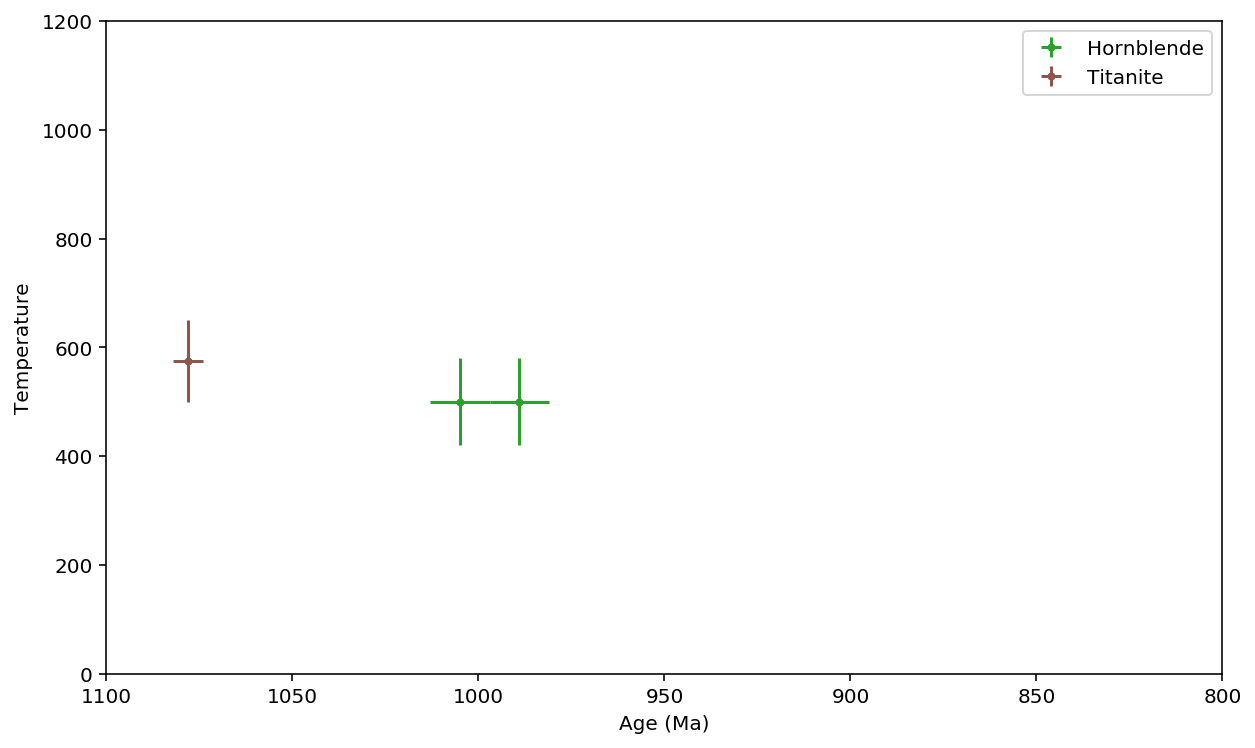

In [46]:
plt.figure(figsize=(10, 6))
for i in Parry_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Parry_ages[Parry_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Shawanaga domain

### Ketchum 1998 

- Ketchum has titanite dates for Britt domain
- sample TK84-91 is notstrongly annealed but contains polycrystalline titanite aggregates derived from recrystalized larger grains
- authors prefer to interpret that the titanite younger than 1018 are hydrothermal in origin

### Slagstad 2004b

### Smye 2018

- I think the rutile ages are oxidation ages! not metamorphic growth ages!

### Tuccillo 1992

In [47]:
Ketchum1998a_ages = pd.read_csv('../data/thermochron_compilation/Ketchum1998a.csv')
Ketchum1998a_ages = Ketchum1998a_ages[Ketchum1998a_ages['Age'] <= 1028]
Ketchum1998a_ages = Ketchum1998a_ages[Ketchum1998a_ages['Age'] >= 1018]
Slagstad2004b_ages = pd.read_csv('../data/thermochron_compilation/Slagstad2004b.csv')
Slagstad2004b_ages = Slagstad2004b_ages[Slagstad2004b_ages['Age'] < 1100]
Smye2018_ages = pd.read_csv('../data/thermochron_compilation/Smye2018a.csv')
Tuccillo1992a_ages = pd.read_csv('../data/thermochron_compilation/Tuccillo1992a.csv')
Tuccillo1992a_ages = Tuccillo1992a_ages[Tuccillo1992a_ages['Age_Material'].str.contains('Titanite')]

Shawanaga_ages = pd.concat([Ketchum1998a_ages, Slagstad2004b_ages, Smye2018_ages, Tuccillo1992a_ages])
Shawanaga_ages = Shawanaga_ages[Shawanaga_ages['Geological_Info'].str.contains('Shawanaga')]
Shawanaga_ages = Shawanaga_ages[~Shawanaga_ages['Age_Material'].str.contains('Allanite|Garnet|Phlogopite|Monazite|Biotite')].reset_index(drop=1)

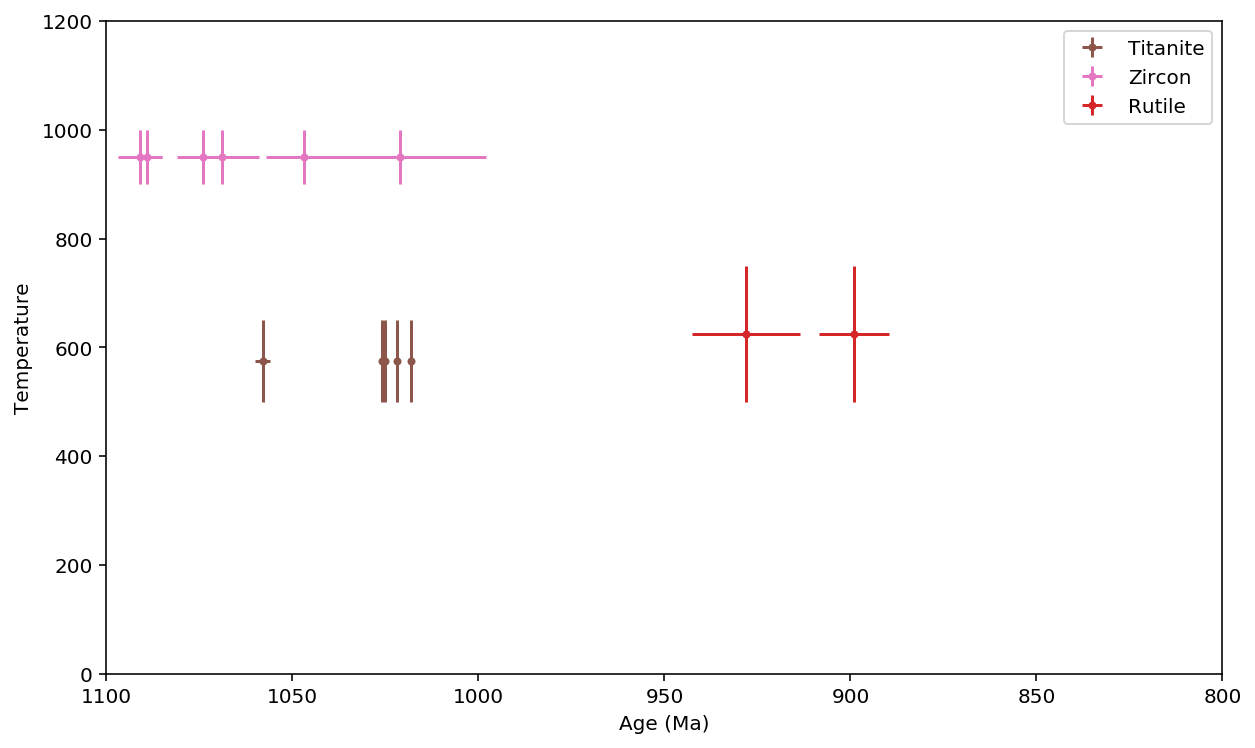

In [48]:
plt.figure(figsize=(10, 6))
for i in Shawanaga_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Shawanaga_ages[Shawanaga_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Muskoka domain
### Cosca 1991, Mezger 1993, Slagstad 2004a, Slagstad 2004b, Timmermann 1997, Timmermann 2002

- Slagstad 2004 only have zircon dates

In [49]:
Cosca1991a_ages = pd.read_csv('../data/thermochron_compilation/Cosca1991a.csv')
Mezger1993a_ages = pd.read_csv('../data/thermochron_compilation/Mezger1993a.csv')
Slagstad2004a_ages = pd.read_csv('../data/thermochron_compilation/Slagstad2004a.csv')
Slagstad2004b_ages = pd.read_csv('../data/thermochron_compilation/Slagstad2004b.csv')
Slagstad2004b_ages = Slagstad2004b_ages[Slagstad2004b_ages['Age'] < 1100]
Timmermann1997a_ages = pd.read_csv('../data/thermochron_compilation/Timmermann1997a.csv')
Timmermann2002a_ages = pd.read_csv('../data/thermochron_compilation/Timmermann2002a.csv')

Muskoka_ages = pd.concat([Cosca1991a_ages, Mezger1993a_ages, Slagstad2004a_ages, Slagstad2004b_ages, Timmermann1997a_ages, Timmermann2002a_ages])
Muskoka_ages = Muskoka_ages[~Muskoka_ages['Age_Interpretation'].str.contains('Protolith|Inheritance')]
Muskoka_ages = Muskoka_ages[Muskoka_ages['Geological_Info'].str.contains('Muskoka')]
Muskoka_ages = Muskoka_ages[~Muskoka_ages['Age_Material'].str.contains('Allanite|Garnet|Phlogopite')].reset_index(drop=1)

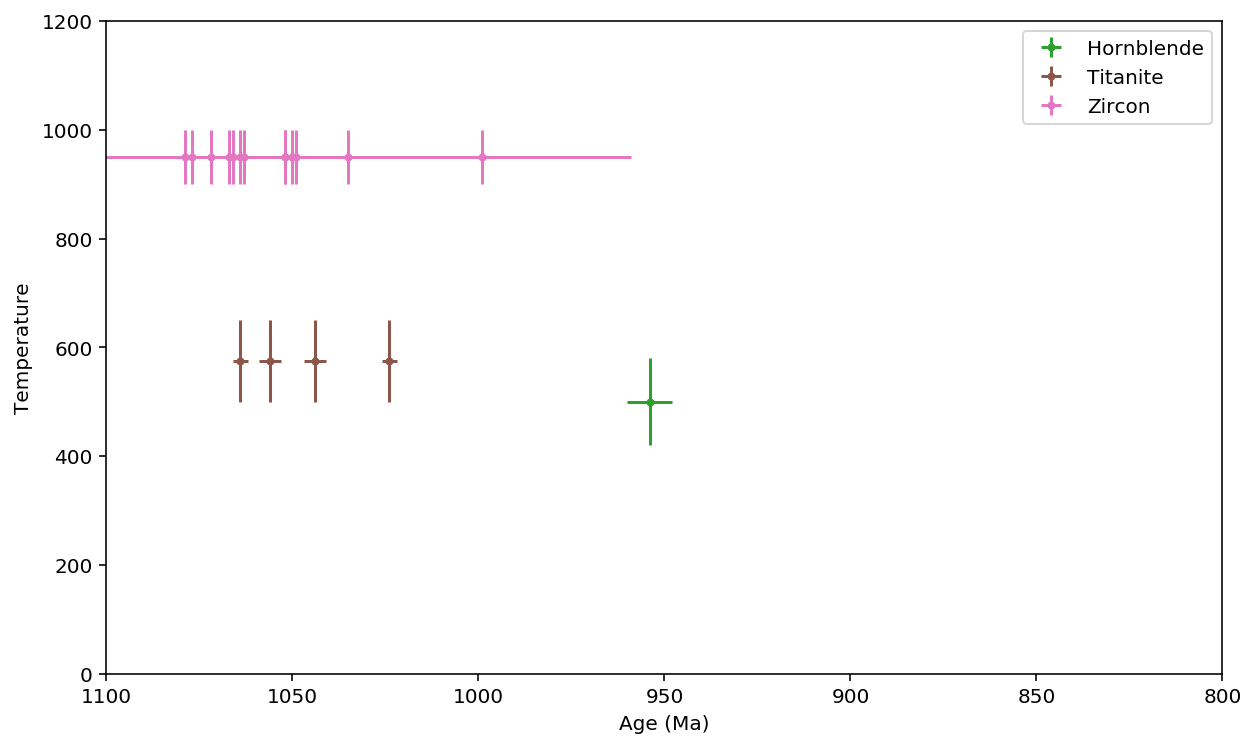

In [50]:
plt.figure(figsize=(10, 6))
for i in Muskoka_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Muskoka_ages[Muskoka_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

# Quebec NE Grenville thermochron

## Allard Lake and St. Urbain thermochron 
- Based on Morisset 2009 U-Pb and Ar
- zircon in 2033-D has very low U concentrations and was interpreted by aurthors to be zircon rims along hemo-ilmenite exsolutions
- authors interprete that some biotite has interlayer alterations and thus not included in the analyses

In [51]:
Allard_Urbain_ages = pd.read_csv('../data/thermochron_compilation/Morisset2009a.csv')
Allard_Urbain_ages = Allard_Urbain_ages.drop([0,10,25])
Allard_Urbain_ages = Allard_Urbain_ages.sort_values(by=['Age_Material', 'Age']).reset_index(drop=1)
Allard_Urbain_ages = Allard_Urbain_ages[~Allard_Urbain_ages['Age_Material'].str.contains('Allanite|Garnet|Phlogopite')].reset_index(drop=1)
# Allard_Urbain_ages

In [68]:
Allard_Urbain_ages.to_csv('../data/thermochron_compilation/Allard_Urbain_ages.csv', index=0)

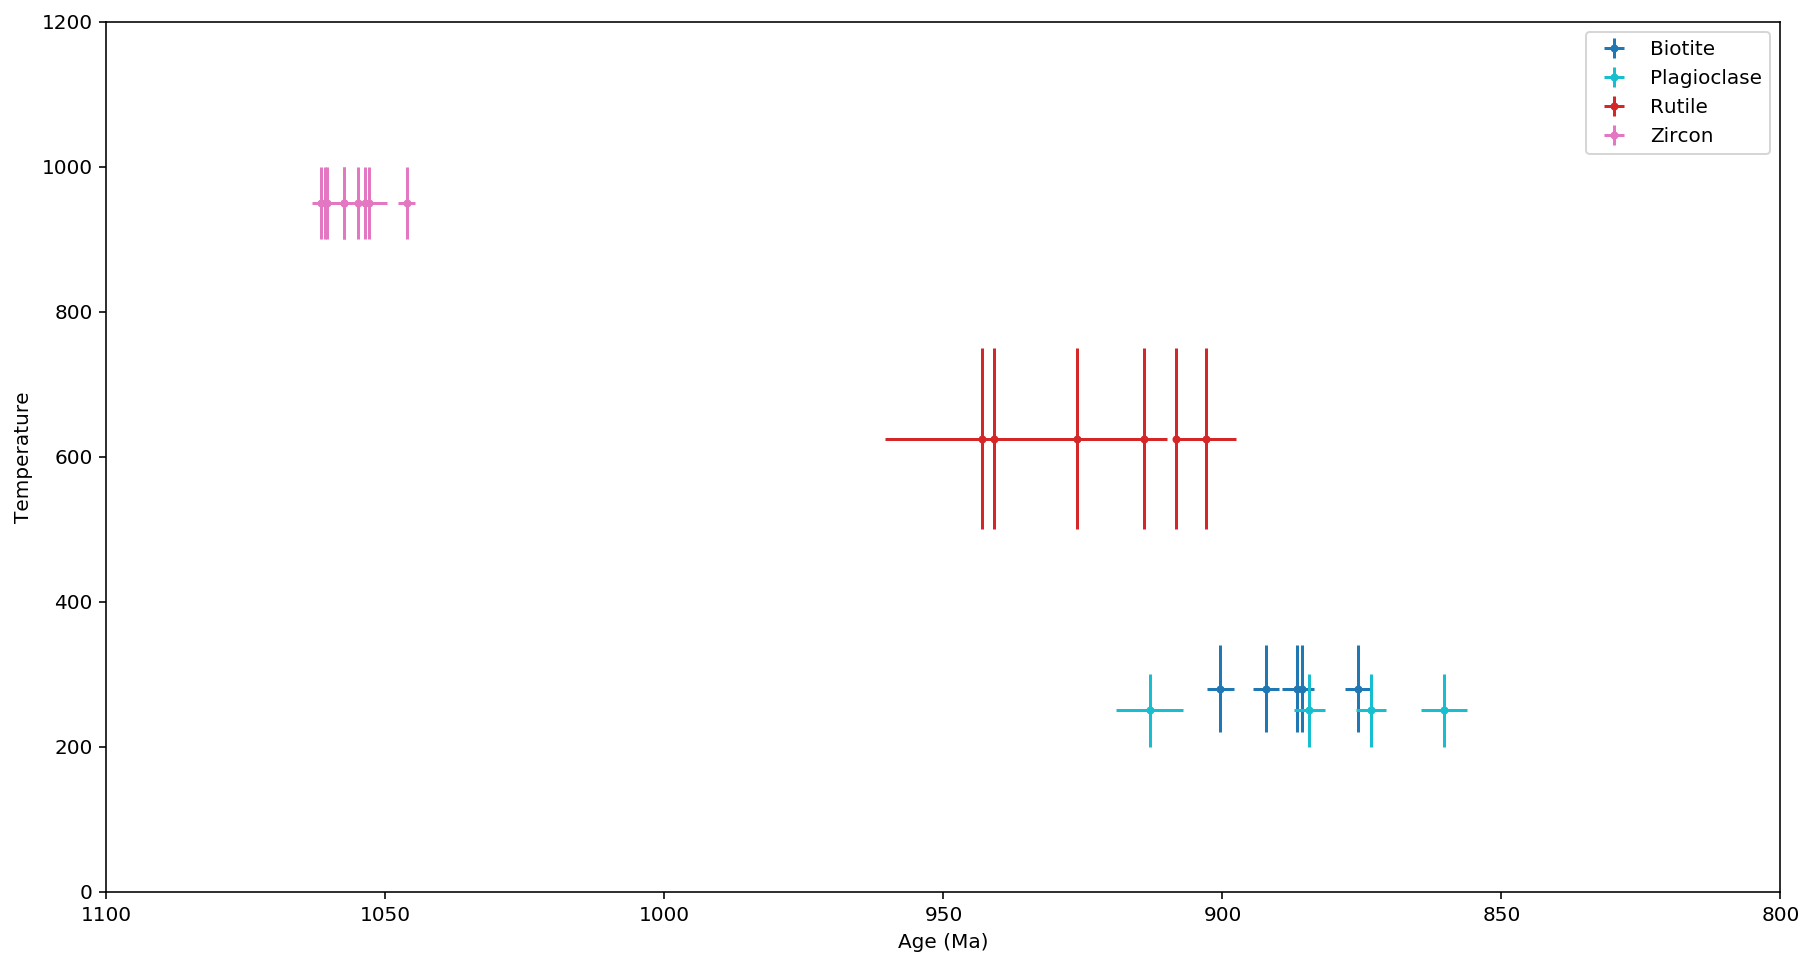

In [53]:
plt.figure(figsize=(15, 8))
for i in Allard_Urbain_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Allard_Urbain_ages[Allard_Urbain_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.ylim(0, 1200)
plt.gca().invert_xaxis()
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Reservoir Dozois terrane

- Childe 1993 Monazite from the Reservoir Dozois Terrane and Renzy Shear Zone near the GF
- The rutile age is helpful - regardless of it being a cooling age or crystallization age (oxidation age) it is young for pmag (hemo!

- Martignole 1997 has Ar dates on hornblende, muscovite, biotite, and k-spar

- Martignole 1998 has more zircon, titanite, and monazite data on the Reservoir Dozois and Renzy Shear zone near the GF in Quebec
- we take the Monazite data for near peak metamorphism age

In [54]:
Childe1993a_ages = pd.read_csv('../data/thermochron_compilation/Childe1993a.csv')
Martignole1997a_ages = pd.read_csv('../data/thermochron_compilation/Martignole1997a.csv')
Martignole1998a_ages = pd.read_csv('../data/thermochron_compilation/Martignole1998a.csv')

Quebec_ages = pd.concat([Childe1993a_ages, Martignole1997a_ages, Martignole1998a_ages])
Quebec_ages = Quebec_ages[Quebec_ages['Geological_Info'].str.contains('Reservoir')]
Quebec_ages = Quebec_ages[~Quebec_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Xenotime')].reset_index(drop=1)

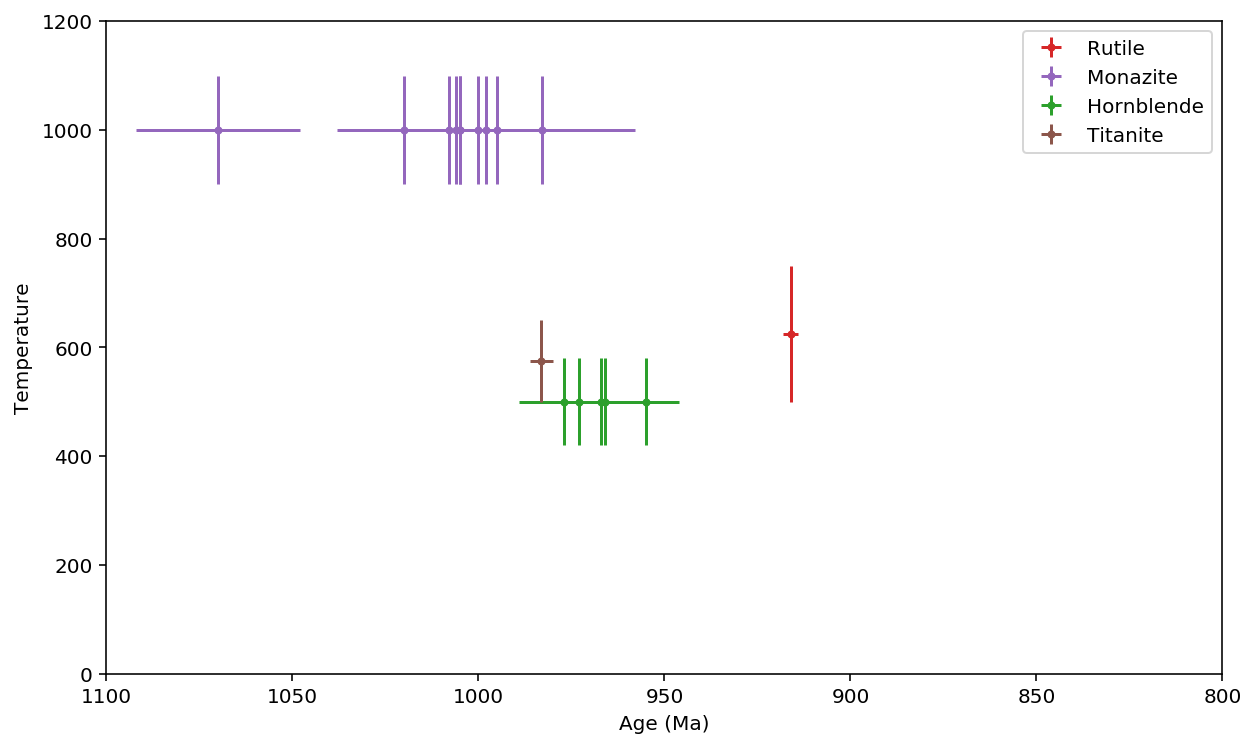

In [55]:
plt.figure(figsize=(10, 6))
for i in Quebec_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Quebec_ages[Quebec_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Riviere-Pentecote Anorthosite

### Martignole 1993
- Martignole 1993 has one concordant titanite data from the anorthosite

In [56]:
Martignole1993a_ages = pd.read_csv('../data/thermochron_compilation/Martignole1993a.csv')


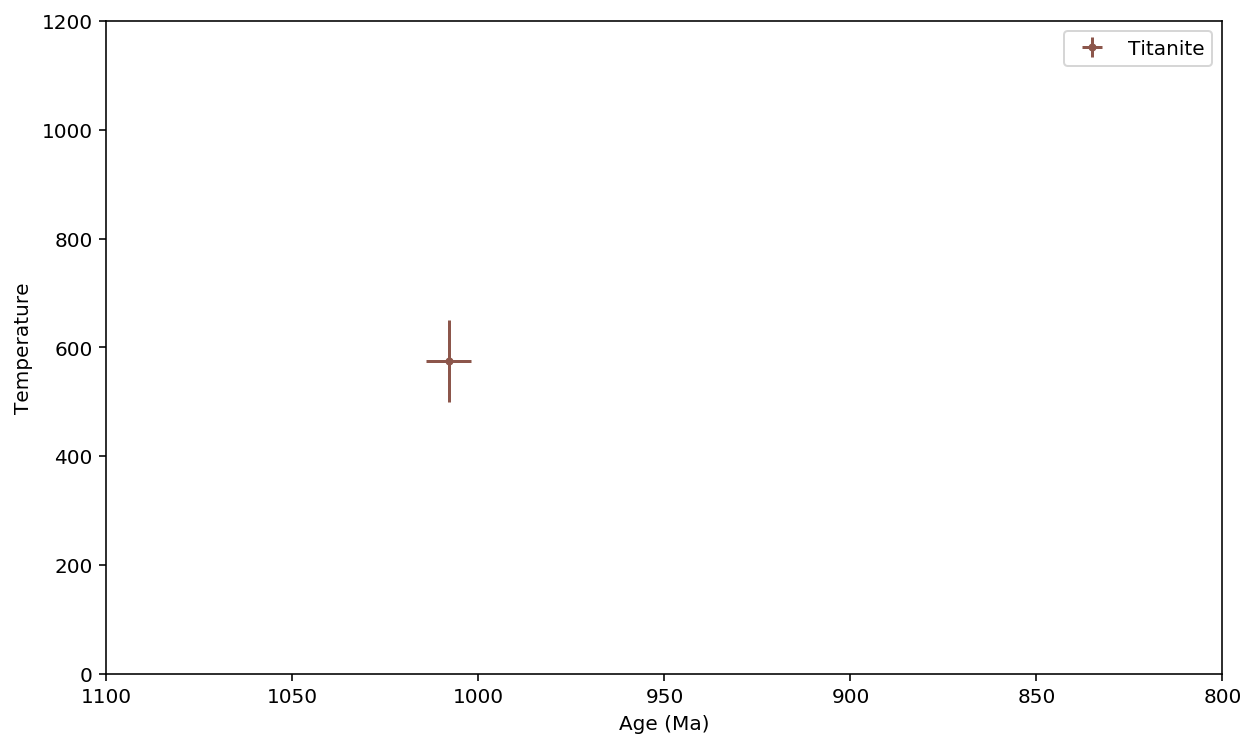

In [57]:
plt.figure(figsize=(10, 6))
for i in Martignole1993a_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Martignole1993a_ages[Martignole1993a_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Morin terrane

### Martignole 1997 Ar dates

In [58]:
Martignole1997a_ages = pd.read_csv('../data/thermochron_compilation/Martignole1997a.csv')
Morin_ages = Martignole1997a_ages
Morin_ages = Morin_ages[Morin_ages['Geological_Info'].str.contains('Morin')]

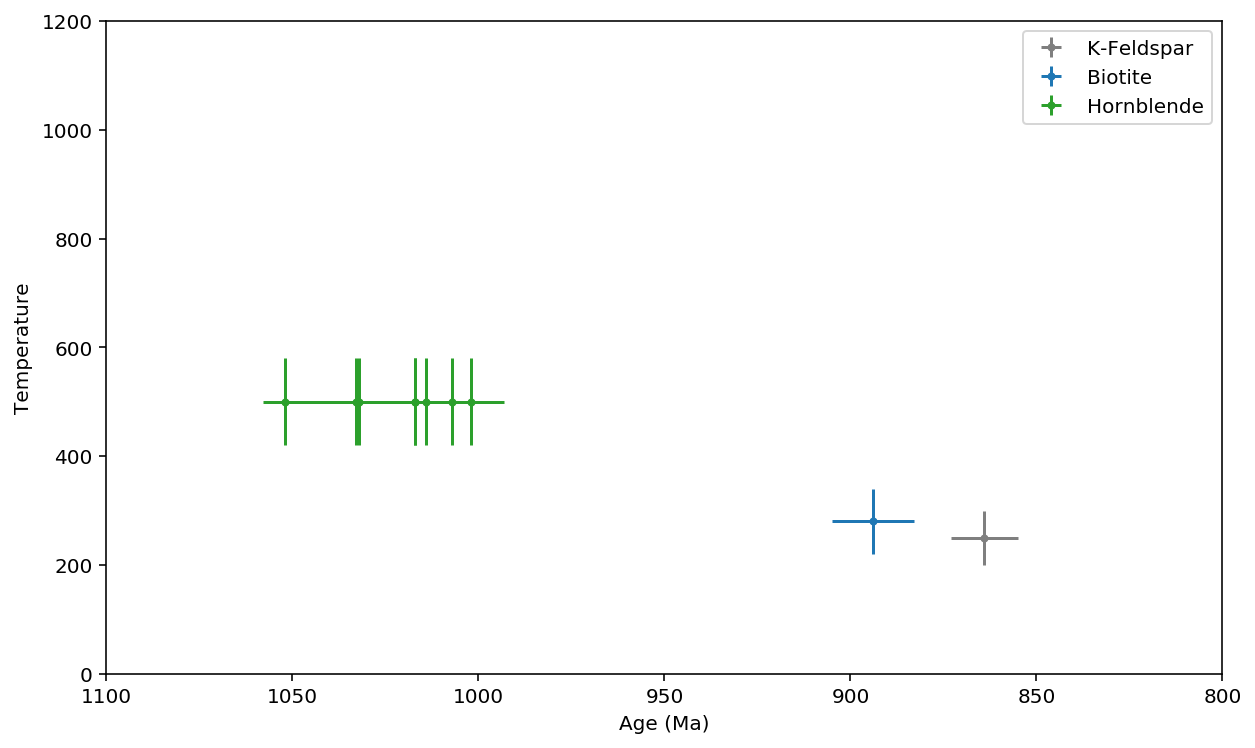

In [59]:
plt.figure(figsize=(10, 6))
for i in Morin_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Morin_ages[Morin_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Mont-Laurier terrane 

### Martignole 1997 Ar dates
- author said the biotite age of sample MLT 19 near 1050 Ma is condordant but there is very likely to have excessive argon in the sample and we drop this date here

### Schneider 2013
- biotite age from sample NC9-11 is anomalously old. although authors say it is nice plateau age, we drop it here

- it is interesting that hornblende ages from Martignole 1997 and Schneider 2013 define two populations
- Martignole 1997 has much older hornblende ages although their biotite ages are similar

- there seems to have differential cooling at thigher temperatures in the Mont-Laurier terrane

In [60]:
Martignole1997a_ages = pd.read_csv('../data/thermochron_compilation/Martignole1997a.csv')
Martignole1997a_ages = Martignole1997a_ages[Martignole1997a_ages['Sample_No'] != 'MLT 19']
Schneider2013a_ages = pd.read_csv('../data/thermochron_compilation/Schneider2013a.csv')
Schneider2013a_ages = Schneider2013a_ages[Schneider2013a_ages['Age'] < 1100]
Schneider2013a_ages = Schneider2013a_ages[Schneider2013a_ages['Sample_No'] != 'NC9-11']
Laurier_ages = pd.concat([Martignole1997a_ages, Schneider2013a_ages])
Quebec_ages = Quebec_ages[~Quebec_ages['Age_Material'].str.contains('Allanite|Garnet|Zircon|Phlogopite|Xenotime')].reset_index(drop=1)
Laurier_ages = Laurier_ages[Laurier_ages['Geological_Info'].str.contains('Laurier')].reset_index(drop=1)

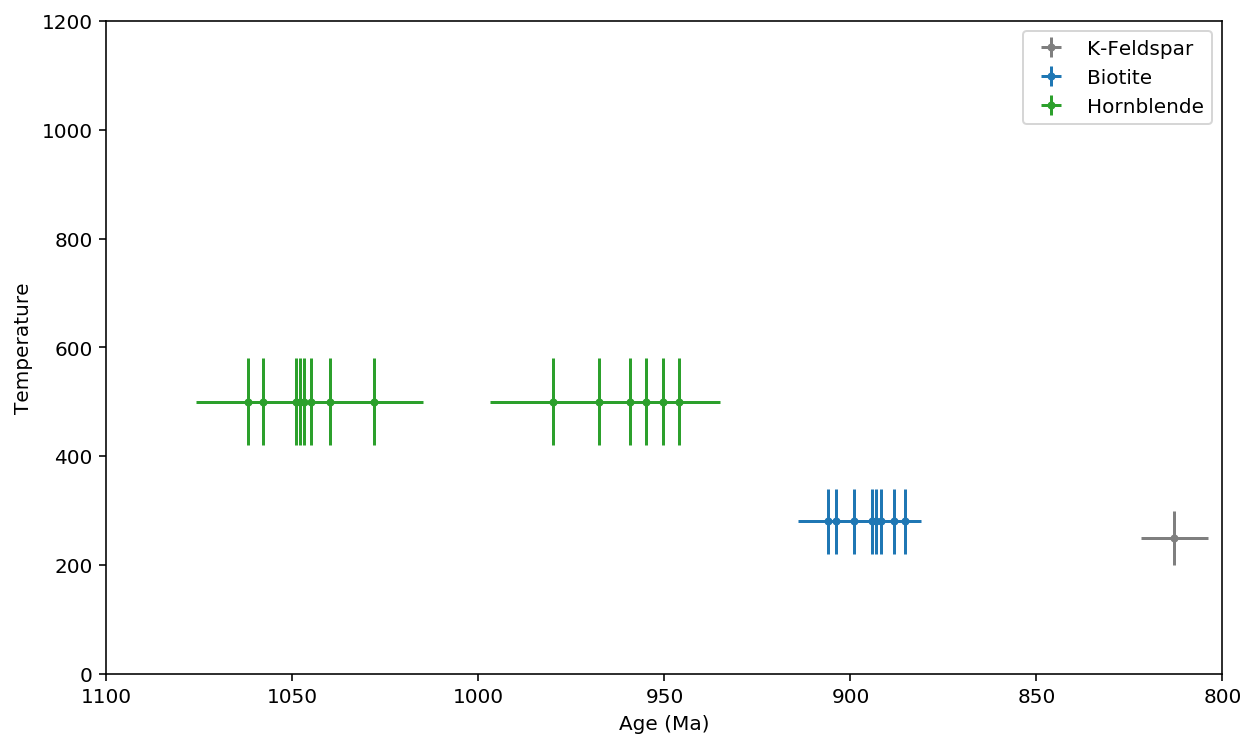

In [61]:
plt.figure(figsize=(10, 6))
for i in Morin_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Laurier_ages[Laurier_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

# Labrador Grenville


## Mealy Mountain 
### Reynolds 1989, Park 1983 Mealy dikes
- the old dates from hornblende and biotite suffer from mineral contaminations and excess argon issue, we filter for all dates < 1100 Ma
- these data could suggest that the Mealy pole is close to 1000 Ma age and the pole position, though poorly constrained, could be smilar to jacobsville pole

In [62]:
Reynolds1989a_ages = pd.read_csv('../data/thermochron_compilation/Reynolds1989a.csv')
Reynolds1989a_ages = Reynolds1989a_ages[Reynolds1989a_ages['Age'] < 1100]
Park1983a_ages = pd.read_csv('../data/thermochron_compilation/Park1983a.csv')
Mealy_ages = pd.concat([Park1983a_ages, Reynolds1989a_ages])
Mealy_ages = Mealy_ages[Mealy_ages['Geological_Info'].str.contains('Mealy')].reset_index(drop=1)

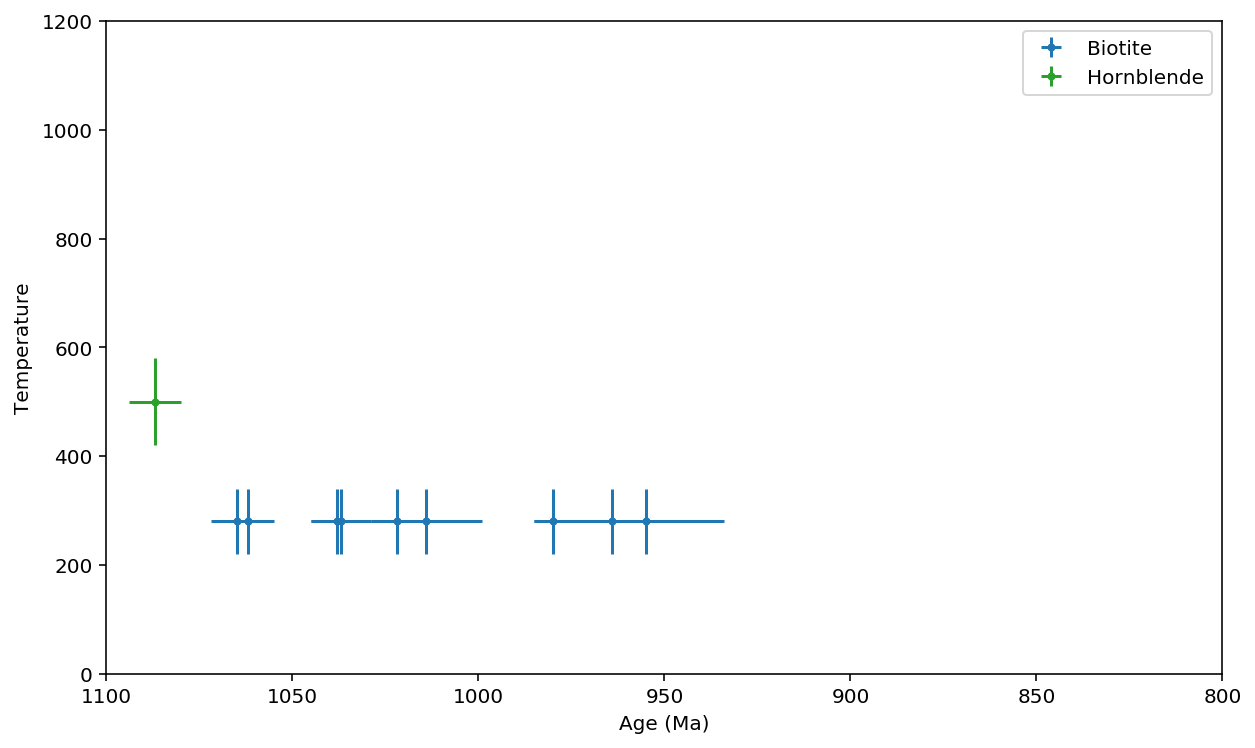

In [63]:
plt.figure(figsize=(10, 6))
for i in Mealy_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Mealy_ages[Mealy_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()

## Michael Gabbro

### Scharer 1986 
- one rutile age for Michael gabbro

In [64]:
Scharer1986a_ages = pd.read_csv('../data/thermochron_compilation/Scharer1986a.csv')

Michael_ages = Scharer1986a_ages
Michael_ages = Michael_ages[Michael_ages['Geological_Info'].str.contains('Michael')].reset_index(drop=1)

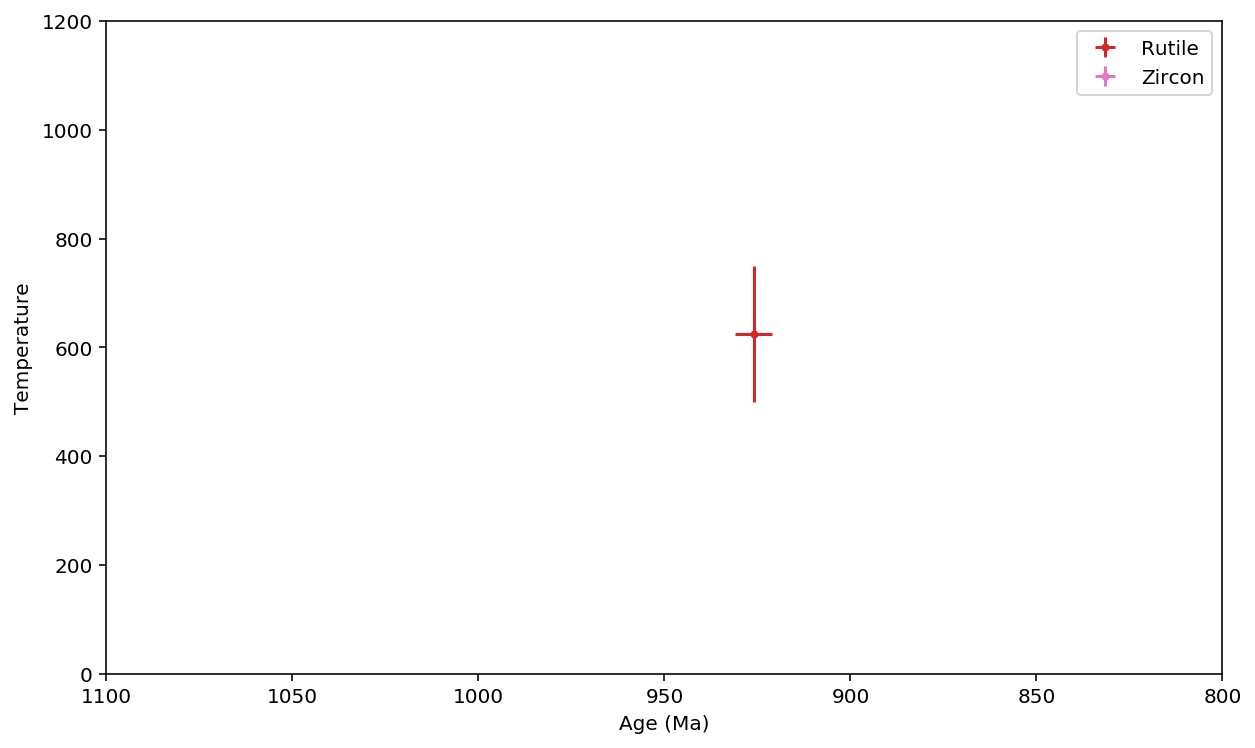

In [65]:
plt.figure(figsize=(10, 6))
for i in Michael_ages.Age_Material.unique():
    closure_temp_bounds = closure_temp_bounds_dict[i]
    this_material = Michael_ages[Michael_ages['Age_Material'] == i]
    plt.errorbar(this_material['Age'], np.full(len(this_material['Age']),closure_temp_bounds[0]), closure_temp_bounds[1], this_material['Error_Plus'], fmt='.',
                 color=color_dict[i], ls='None', label=i)
plt.ylabel('Temperature')
plt.xlabel('Age (Ma)')
plt.gca().invert_xaxis()
plt.ylim(0, 1200)
plt.xlim(1100, 800)
plt.legend()
plt.show()